In [5870]:
%automagic


Automagic is OFF, % prefix IS needed for line magics.


In [5871]:
import pandas as pd
import numpy as np

In [5872]:
folder = '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid'
!ls {folder}

01_Originals_data  02_Desarrollo  README.md


In [5873]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid'

In [5874]:
os.chdir(folder)
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid'

In [5875]:
# Read from excel file with column names stipulated:
# FECHA	RANGO HORARIO	DIA SEMANA	DISTRITO	LUGAR ACCIDENTE	Nº	Nº PARTE	CPFA Granizo	CPFA Hielo	CPFA Lluvia	CPFA Niebla	CPFA Seco	CPFA Nieve	CPSV Mojada	CPSV Aceite	CPSV Barro	CPSV Grava Suelta	CPSV Hielo	CPSV Seca Y Limpia	Nº VICTIMAS *	TIPO ACCIDENTE	Tipo Vehiculo	TIPO PERSONA	SEXO	LESIVIDAD	Tramo Edad
# x
# FECHA   RANGO_HORARIO   DIA_SEMANA      DISTRITO        LUGAR_ACCIDENTE BORRAR  BORRAR          BORRAR          BORRAR          BORRAR          BORRAR          BORRAR          BORRAR          BORRAR          BORRAR          BORRAR          BORRAR                  BORRAR          BORRAR                  NUM_PERSONAS    TIPO_ACCIDENTE  TIPO_VEHICULO   TIPO_PERSONA    SEXO    LESIVIDAD       TRAMO_EDAD

df_from_xls = pd.read_excel('./01_Originals_data/2010_Accidentalidad.xlsx',
                     sheet_name='LISTADO DE ACCIDENTES MENSUALES',
                     index_col=None,
                     names=['FECHA', 'RANGO_HORARIO', 'DIA_SEMANA', 'DISTRITO', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'NUM_PERSONAS', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'TRAMO_EDAD'])


In [5876]:
df_from_xls.head()

,FECHA,RANGO_HORARIO,DIA_SEMANA,DISTRITO,BORRAR,BORRAR,BORRAR,BORRAR,BORRAR,BORRAR,...,BORRAR,BORRAR,BORRAR,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,TRAMO_EDAD
0,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,NO,NO,NO,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20 AÑOS
1,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,NO,NO,NO,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 50 A 54 AÑOS
2,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,NO,NO,NO,1,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HL,DE 40 A 44 AÑOS
3,2010-01-01,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM. ...,10200,2010/94,NO,NO,NO,...,NO,NO,NO,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 25 A 29 AÑOS
4,2010-01-01,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM. ...,10200,2010/94,NO,NO,NO,...,NO,NO,NO,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 30 A 34 ANOS


In [5877]:
df_from_xls.shape

(26578, 26)

In [5878]:
df_from_xls.duplicated().sum()

874

In [5879]:
# Comprobar valores nulos
df_from_xls.isnull().sum()

FECHA             0
RANGO_HORARIO     0
DIA_SEMANA        0
DISTRITO          0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
BORRAR            0
NUM_PERSONAS      0
TIPO_ACCIDENTE    0
TIPO_VEHICULO     0
TIPO_PERSONA      0
SEXO              0
LESIVIDAD         0
TRAMO_EDAD        0
dtype: int64

In [5880]:
# borrar columnas sobrantes:
del df_from_xls['BORRAR']

In [5881]:
df_from_xls.shape

(26578, 11)

In [5882]:
df_from_xls.head(20)

,FECHA,RANGO_HORARIO,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,TRAMO_EDAD
0,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20 AÑOS
1,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 50 A 54 AÑOS
2,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HL,DE 40 A 44 AÑOS
3,2010-01-01,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 25 A 29 AÑOS
4,2010-01-01,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 30 A 34 ANOS
5,2010-01-01,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 25 A 29 AÑOS
6,2010-01-01,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 25 A 29 AÑOS
7,2010-01-01,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 25 A 29 AÑOS
8,2010-01-01,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,TURISMO,CONDUCTOR,MUJER,HL,DE 25 A 29 AÑOS
9,2010-01-01,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,TURISMO,VIAJERO,MUJER,HL,DE 21 A 24 AÑOS


In [5883]:
df_from_xls.dtypes

FECHA             datetime64[ns]
RANGO_HORARIO             object
DIA_SEMANA                object
DISTRITO                  object
NUM_PERSONAS               int64
TIPO_ACCIDENTE            object
TIPO_VEHICULO             object
TIPO_PERSONA              object
SEXO                      object
LESIVIDAD                 object
TRAMO_EDAD                object
dtype: object

In [5884]:
df_from_xls.columns

Index(['FECHA', 'RANGO_HORARIO', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'TRAMO_EDAD'],
      dtype='object')

In [5885]:
df_from_xls.fillna("NO_ASIGNADO", inplace=True) 

In [5886]:
# Comprobar valores nulos
df_from_xls.isnull().sum()

FECHA             0
RANGO_HORARIO     0
DIA_SEMANA        0
DISTRITO          0
NUM_PERSONAS      0
TIPO_ACCIDENTE    0
TIPO_VEHICULO     0
TIPO_PERSONA      0
SEXO              0
LESIVIDAD         0
TRAMO_EDAD        0
dtype: int64

In [5887]:
df_from_xls.duplicated().sum()

877

In [5888]:
df_dupls = df_from_xls[df_from_xls.duplicated(keep=False)]
df_dupls_values = df_dupls.groupby(df_dupls.columns.tolist()).apply(lambda x: x.index.tolist()).values.tolist()
df_dupls_relation = df_dupls.groupby(df_dupls.columns.tolist()).apply(lambda x: x.index.tolist())

In [5889]:
type(df_dupls_values)

list

In [5890]:
type(df_dupls_relation)

pandas.core.series.Series

In [5891]:
df_dupls_values

[[3, 5, 6],
 [31, 32],
 [87, 88],
 [137, 138],
 [160, 161],
 [257, 258, 259, 260],
 [301, 302],
 [356, 358],
 [405, 406],
 [426, 427],
 [433, 435],
 [497, 498],
 [499, 501],
 [507, 508],
 [567, 568],
 [587, 588],
 [593, 594],
 [649, 650, 651, 652],
 [685, 686],
 [734, 735, 736],
 [742, 743],
 [774, 775],
 [788, 789],
 [796, 797, 798],
 [817, 818],
 [872, 873],
 [877, 879, 880, 881],
 [941, 945],
 [1134, 1135],
 [1037, 1038],
 [1183, 1184],
 [1255, 1256],
 [1268, 1269, 1270, 1271, 1272],
 [1204, 1205, 1206],
 [1331, 1332],
 [1417, 1418],
 [1419, 1420],
 [1453, 1454, 1455, 1456],
 [1519, 1520, 1521],
 [1539, 1540],
 [1601, 1602],
 [1743, 1744, 1745],
 [1754, 1755],
 [1700, 1701, 1702],
 [1803, 1804],
 [1840, 1841],
 [1870, 1871],
 [1880, 1881],
 [1886, 1887],
 [1919, 1920],
 [1953, 1954],
 [1891, 1892],
 [2070, 2071, 2072],
 [2080, 2081, 2082, 2083],
 [2102, 2103],
 [2025, 2026],
 [2030, 2031],
 [2175, 2176],
 [2183, 2184],
 [2186, 2187, 2188],
 [2253, 2254],
 [2313, 2314],
 [2327, 2328,

In [5892]:
df_dupls_relation

FECHA       RANGO_HORARIO     DIA_SEMANA  DISTRITO                        NUM_PERSONAS  TIPO_ACCIDENTE                            TIPO_VEHICULO                             TIPO_PERSONA                              SEXO         LESIVIDAD                                 TRAMO_EDAD        
2010-01-01  DE 1:00 A 1:59    VIERNES     PUENTE DE VALLECAS              7             COLISIÓN MÚLTIPLE                         NO ASIGNADO                               VIAJERO                                   MUJER        HL                                        DE 25 A 29 AÑOS                   [3, 5, 6]
            DE 9:00 A 9:59    VIERNES     SALAMANCA                       1             CHOQUE CON OBJETO FIJO                    NO ASIGNADO                               TESTIGO                                   HOMBRE       IL                                        DE 21 A 24 AÑOS                    [31, 32]
2010-01-02  DE 19:00 A 19:59  SABADO      CARABANCHEL                     1           

In [5893]:
#df_from_xls.iloc[3]

In [5894]:
#df_from_xls.iloc[5]

In [5895]:
#df_from_xls.iloc[6]

In [5896]:
#df_dupls_relation = pd.DataFrame(df_dupls_relation)
#df_dupls_relation.count()

In [5897]:
#df_dupls_relation.head()

In [5898]:
# strip leading and trailing space
# no string: df_from_xls['FECHA'] = df_from_xls['FECHA'].str.strip()
df_from_xls['RANGO_HORARIO'] = df_from_xls['RANGO_HORARIO'].str.strip()
df_from_xls['DIA_SEMANA'] = df_from_xls['DIA_SEMANA'].str.strip()
df_from_xls['DISTRITO'] = df_from_xls['DISTRITO'].str.strip()
# no string: df_from_xls['NUM_PERSONAS'] = df_from_xls['NUM_PERSONAS'].str.strip()
df_from_xls['TIPO_ACCIDENTE'] = df_from_xls['TIPO_ACCIDENTE'].str.strip()
df_from_xls['TIPO_VEHICULO'] = df_from_xls['TIPO_VEHICULO'].str.strip()
df_from_xls['TIPO_PERSONA'] = df_from_xls['TIPO_PERSONA'].str.strip()
df_from_xls['SEXO'] = df_from_xls['SEXO'].str.strip()
df_from_xls['LESIVIDAD'] = df_from_xls['LESIVIDAD'].str.strip()
df_from_xls['TRAMO_EDAD'] = df_from_xls['TRAMO_EDAD'].str.strip()

In [5899]:
df_from_xls["FECHA"].unique()

array(['2010-01-01T00:00:00.000000000', '2010-01-02T00:00:00.000000000',
       '2010-01-03T00:00:00.000000000', '2010-01-04T00:00:00.000000000',
       '2010-01-05T00:00:00.000000000', '2010-01-06T00:00:00.000000000',
       '2010-01-07T00:00:00.000000000', '2010-01-08T00:00:00.000000000',
       '2010-01-09T00:00:00.000000000', '2010-01-10T00:00:00.000000000',
       '2010-01-11T00:00:00.000000000', '2010-01-12T00:00:00.000000000',
       '2010-01-13T00:00:00.000000000', '2010-01-14T00:00:00.000000000',
       '2010-01-15T00:00:00.000000000', '2010-01-16T00:00:00.000000000',
       '2010-01-17T00:00:00.000000000', '2010-01-18T00:00:00.000000000',
       '2010-01-19T00:00:00.000000000', '2010-01-20T00:00:00.000000000',
       '2010-01-21T00:00:00.000000000', '2010-01-22T00:00:00.000000000',
       '2010-01-23T00:00:00.000000000', '2010-01-24T00:00:00.000000000',
       '2010-01-25T00:00:00.000000000', '2010-01-26T00:00:00.000000000',
       '2010-01-27T00:00:00.000000000', '2010-01-28

In [5900]:
df_from_xls["RANGO_HORARIO"].unique()

array(['DE 00:00 A 00:59', 'DE 1:00 A 1:59', 'DE 2:00 A 2:59',
       'DE 4:00 A 4:59', 'DE 5:00 A 5:59', 'DE 8:00 A 8:59',
       'DE 9:00 A 9:59', 'DE 20:00 A 20:59', 'DE 21:00 A 21:59',
       'DE 6:00 A 6:59', 'DE 11:00 A 11:59', 'DE 12:00 A 12:59',
       'DE 13:00 A 13:59', 'DE 14:00 A 14:59', 'DE 15:00 A 15:59',
       'DE 18:00 A 18:59', 'DE 19:00 A 19:59', 'DE 22:00 A 22:59',
       'DE 16:00 A 16:59', 'DE 17:00 A 17:59', 'DE 23:00 A 23:59',
       'DE 7:00 A 7:59', 'DE 10:00 A 10:59', 'DE 3:00 A 3:59'],
      dtype=object)

In [5901]:
df_from_xls["DIA_SEMANA"].unique()

array(['VIERNES', 'SABADO', 'DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES',
       'JUEVES'], dtype=object)

In [5902]:
df_from_xls["DISTRITO"].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [5903]:
df_from_xls["NUM_PERSONAS"].unique()

array([ 1,  7,  2,  3,  4,  5,  9,  6,  8, 18, 13])

In [5904]:
df_from_xls["TIPO_ACCIDENTE"].unique()

array(['COLISIÓN DOBLE', 'COLISIÓN MÚLTIPLE', 'CHOQUE CON OBJETO FIJO',
       'CAÍDA MOTOCICLETA', 'ATROPELLO', 'VUELCO', 'CAÍDA CICLOMOTOR',
       'CAÍDA VIAJERO BUS', 'OTRAS CAUSAS', 'CAÍDA BICICLETA'],
      dtype=object)

In [5905]:
df_from_xls["TIPO_VEHICULO"].unique()

array(['TURISMO', 'NO ASIGNADO', 'FURGONETA', 'MOTOCICLETA', 'AUTO-TAXI',
       'VARIOS', 'CAMION', 'CICLOMOTOR', 'AUTOBUS-AUTOCAR', 'BICICLETA',
       'AMBULANCIA'], dtype=object)

In [5906]:
df_from_xls["TIPO_PERSONA"].unique()

array(['CONDUCTOR', 'VIAJERO', 'TESTIGO', 'PEATON'], dtype=object)

In [5907]:
df_from_xls["SEXO"].unique()

array(['HOMBRE', 'MUJER', 'NO ASIGNADO'], dtype=object)

In [5908]:
df_from_xls["LESIVIDAD"].unique()

array(['IL', 'HL', 'HG', 'NO ASIGNADA', 'MT'], dtype=object)

In [5909]:
df_from_xls["TRAMO_EDAD"].unique()

array(['DE 18 A 20 AÑOS', 'DE 50 A 54 AÑOS', 'DE 40 A 44 AÑOS',
       'DE 25 A 29 AÑOS', 'DE 30 A 34 ANOS', 'DE 21 A 24 AÑOS',
       'DE 35 A 39 AÑOS', 'DE 60 A 64 AÑOS', 'DE 45 A 49 AÑOS',
       'DE 0 A 5 AÑOS', 'DESCONOCIDA', 'DE 70 A 74 AÑOS',
       'DE MAS DE 74 AÑOS', 'DE 10 A 14 AÑOS', 'DE 6 A 9 AÑOS',
       'DE 55 A 59 AÑOS', 'DE 65 A 69 AÑOS', 'DE 15 A 17 AÑOS'],
      dtype=object)

In [5910]:
df_from_xls.dtypes

FECHA             datetime64[ns]
RANGO_HORARIO             object
DIA_SEMANA                object
DISTRITO                  object
NUM_PERSONAS               int64
TIPO_ACCIDENTE            object
TIPO_VEHICULO             object
TIPO_PERSONA              object
SEXO                      object
LESIVIDAD                 object
TRAMO_EDAD                object
dtype: object

In [5911]:
df_from_xls["RANGO_HORARIO"][0]

'DE 00:00 A 00:59'

In [5912]:
df_from_xls['BORRAR'], df_from_xls['RESTO_RANGO_HORARIO'] = df_from_xls['RANGO_HORARIO'].str.split(' ', 1).str 

In [5913]:
df_from_xls.columns

Index(['FECHA', 'RANGO_HORARIO', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'TRAMO_EDAD', 'BORRAR', 'RESTO_RANGO_HORARIO'],
      dtype='object')

In [5914]:
df_from_xls.head(1)

,FECHA,RANGO_HORARIO,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,TRAMO_EDAD,BORRAR,RESTO_RANGO_HORARIO
0,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20 AÑOS,DE,00:00 A 00:59


In [5915]:
df_from_xls.tail(1)

,FECHA,RANGO_HORARIO,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,TRAMO_EDAD,BORRAR,RESTO_RANGO_HORARIO
26577,2010-12-31,DE 23:00 A 23:59,VIERNES,RETIRO,1,ATROPELLO,TURISMO,VIAJERO,HOMBRE,IL,DE 55 A 59 AÑOS,DE,23:00 A 23:59


In [5916]:
# borrar columnas sobrantes:
del df_from_xls['BORRAR']

In [5917]:
df_from_xls.head(1)

,FECHA,RANGO_HORARIO,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,TRAMO_EDAD,RESTO_RANGO_HORARIO
0,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20 AÑOS,00:00 A 00:59


In [5918]:
df_from_xls['HORA'], df_from_xls['BORRAR'] = df_from_xls['RESTO_RANGO_HORARIO'].str.split(' ', 1).str 

In [5919]:
df_from_xls.head(1)

,FECHA,RANGO_HORARIO,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,TRAMO_EDAD,RESTO_RANGO_HORARIO,HORA,BORRAR
0,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20 AÑOS,00:00 A 00:59,00:00,A 00:59


In [5920]:
# borrar columnas sobrantes:
df_from_xls = df_from_xls.drop(["RANGO_HORARIO","RESTO_RANGO_HORARIO","BORRAR"], axis=1)

In [5921]:
df_from_xls.head(1)

,FECHA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,TRAMO_EDAD,HORA
0,2010-01-01,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20 AÑOS,00:00


In [5922]:
df_from_xls.columns

Index(['FECHA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'TRAMO_EDAD',
       'HORA'],
      dtype='object')

In [5923]:
# Contar observaciones
df_from_xls.count()

FECHA             26578
DIA_SEMANA        26578
DISTRITO          26578
NUM_PERSONAS      26578
TIPO_ACCIDENTE    26578
TIPO_VEHICULO     26578
TIPO_PERSONA      26578
SEXO              26578
LESIVIDAD         26578
TRAMO_EDAD        26578
HORA              26578
dtype: int64

In [5924]:
df_from_xls["HORA"][0]

'00:00'

In [5925]:
df_from_xls.columns

Index(['FECHA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'TRAMO_EDAD',
       'HORA'],
      dtype='object')

In [5926]:
ordenar_columnas = df_from_xls.columns.tolist()
ordenar_columnas

['FECHA',
 'DIA_SEMANA',
 'DISTRITO',
 'NUM_PERSONAS',
 'TIPO_ACCIDENTE',
 'TIPO_VEHICULO',
 'TIPO_PERSONA',
 'SEXO',
 'LESIVIDAD',
 'TRAMO_EDAD',
 'HORA']

In [5927]:
ordenar_columnas = ordenar_columnas[0:1] + ordenar_columnas[-1:] + ordenar_columnas[1:-1]
ordenar_columnas

['FECHA',
 'HORA',
 'DIA_SEMANA',
 'DISTRITO',
 'NUM_PERSONAS',
 'TIPO_ACCIDENTE',
 'TIPO_VEHICULO',
 'TIPO_PERSONA',
 'SEXO',
 'LESIVIDAD',
 'TRAMO_EDAD']

In [5928]:
df_from_xls = df_from_xls[ordenar_columnas]
df_from_xls

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,TRAMO_EDAD
0,2010-01-01,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20 AÑOS
1,2010-01-01,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 50 A 54 AÑOS
2,2010-01-01,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HL,DE 40 A 44 AÑOS
3,2010-01-01,1:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 25 A 29 AÑOS
4,2010-01-01,1:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 30 A 34 ANOS
5,2010-01-01,1:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 25 A 29 AÑOS
6,2010-01-01,1:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 25 A 29 AÑOS
7,2010-01-01,1:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 25 A 29 AÑOS
8,2010-01-01,1:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,TURISMO,CONDUCTOR,MUJER,HL,DE 25 A 29 AÑOS
9,2010-01-01,1:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,TURISMO,VIAJERO,MUJER,HL,DE 21 A 24 AÑOS


In [5929]:
df_from_xls["FECHA"][0]

Timestamp('2010-01-01 00:00:00')

In [5930]:
df_from_xls["FECHA"][26577]

Timestamp('2010-12-31 00:00:00')

In [5931]:
df_from_xls["FECHA"] = df_from_xls["FECHA"].dt.strftime('%d/%m/%Y')

In [5932]:
df_from_xls["FECHA"][0]

'01/01/2010'

In [5933]:
type(df_from_xls["FECHA"])

pandas.core.series.Series

In [5934]:
df_from_xls.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,TRAMO_EDAD
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20 AÑOS


In [5935]:
df_from_xls.dtypes

FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
TRAMO_EDAD        object
dtype: object

In [5936]:
df_from_xls["TRAMO_EDAD"].unique()

array(['DE 18 A 20 AÑOS', 'DE 50 A 54 AÑOS', 'DE 40 A 44 AÑOS',
       'DE 25 A 29 AÑOS', 'DE 30 A 34 ANOS', 'DE 21 A 24 AÑOS',
       'DE 35 A 39 AÑOS', 'DE 60 A 64 AÑOS', 'DE 45 A 49 AÑOS',
       'DE 0 A 5 AÑOS', 'DESCONOCIDA', 'DE 70 A 74 AÑOS',
       'DE MAS DE 74 AÑOS', 'DE 10 A 14 AÑOS', 'DE 6 A 9 AÑOS',
       'DE 55 A 59 AÑOS', 'DE 65 A 69 AÑOS', 'DE 15 A 17 AÑOS'],
      dtype=object)

In [5937]:
df_from_xls['BORRAR'], df_from_xls['EDAD'] = df_from_xls['TRAMO_EDAD'].str.split(' ', 1).str 

In [5938]:
df_from_xls.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'TRAMO_EDAD', 'BORRAR', 'EDAD'],
      dtype='object')

In [5939]:
df_from_xls["EDAD"].unique()

array(['18 A 20 AÑOS', '50 A 54 AÑOS', '40 A 44 AÑOS', '25 A 29 AÑOS',
       '30 A 34 ANOS', '21 A 24 AÑOS', '35 A 39 AÑOS', '60 A 64 AÑOS',
       '45 A 49 AÑOS', '0 A 5 AÑOS', nan, '70 A 74 AÑOS',
       'MAS DE 74 AÑOS', '10 A 14 AÑOS', '6 A 9 AÑOS', '55 A 59 AÑOS',
       '65 A 69 AÑOS', '15 A 17 AÑOS'], dtype=object)

In [5940]:
# Comprobar valores nulos
df_from_xls.isnull().sum()

FECHA                0
HORA                 0
DIA_SEMANA           0
DISTRITO             0
NUM_PERSONAS         0
TIPO_ACCIDENTE       0
TIPO_VEHICULO        0
TIPO_PERSONA         0
SEXO                 0
LESIVIDAD            0
TRAMO_EDAD           0
BORRAR               0
EDAD              2344
dtype: int64

In [5941]:
# borrar columnas sobrantes:
del df_from_xls['BORRAR']
del df_from_xls['TRAMO_EDAD']

In [5942]:
df_from_xls['TRAMO_EDAD'], df_from_xls['BORRAR'] = df_from_xls['EDAD'].str.split(' ', 1).str 

In [5943]:
df_from_xls.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD', 'TRAMO_EDAD', 'BORRAR'],
      dtype='object')

In [5944]:
df_from_xls["TRAMO_EDAD"].unique()

array(['18', '50', '40', '25', '30', '21', '35', '60', '45', '0', nan,
       '70', 'MAS', '10', '6', '55', '65', '15'], dtype=object)

In [5945]:
# Comprobar valores nulos
df_from_xls.isnull().sum()

FECHA                0
HORA                 0
DIA_SEMANA           0
DISTRITO             0
NUM_PERSONAS         0
TIPO_ACCIDENTE       0
TIPO_VEHICULO        0
TIPO_PERSONA         0
SEXO                 0
LESIVIDAD            0
EDAD              2344
TRAMO_EDAD        2344
BORRAR            2344
dtype: int64

In [5946]:
# borrar columnas sobrantes:
del df_from_xls['EDAD']
del df_from_xls['BORRAR']

In [5947]:
# Comprobar valores nulos
df_from_xls.isnull().sum()

FECHA                0
HORA                 0
DIA_SEMANA           0
DISTRITO             0
NUM_PERSONAS         0
TIPO_ACCIDENTE       0
TIPO_VEHICULO        0
TIPO_PERSONA         0
SEXO                 0
LESIVIDAD            0
TRAMO_EDAD        2344
dtype: int64

In [5948]:
df_from_xls["TRAMO_EDAD"].unique()

array(['18', '50', '40', '25', '30', '21', '35', '60', '45', '0', nan,
       '70', 'MAS', '10', '6', '55', '65', '15'], dtype=object)

In [5949]:
df_from_xls["TRAMO_EDAD"] = df_from_xls["TRAMO_EDAD"].replace({"MAS":74}, regex=True)

In [5950]:
df_from_xls["TRAMO_EDAD"].unique()

array(['18', '50', '40', '25', '30', '21', '35', '60', '45', '0', nan,
       '70', 74, '10', '6', '55', '65', '15'], dtype=object)

In [5951]:
df_from_xls["TRAMO_EDAD"].fillna("NO_ASIGNADO", inplace=True) 

In [5952]:
df_from_xls["TRAMO_EDAD"].unique()

array(['18', '50', '40', '25', '30', '21', '35', '60', '45', '0',
       'NO_ASIGNADO', '70', 74, '10', '6', '55', '65', '15'], dtype=object)

In [5953]:
# Comprobar valores nulos
df_from_xls.isnull().sum()

FECHA             0
HORA              0
DIA_SEMANA        0
DISTRITO          0
NUM_PERSONAS      0
TIPO_ACCIDENTE    0
TIPO_VEHICULO     0
TIPO_PERSONA      0
SEXO              0
LESIVIDAD         0
TRAMO_EDAD        0
dtype: int64

In [5954]:
df_from_xls.shape

(26578, 11)

In [5955]:
df_from_xls.duplicated().sum()

877

In [5956]:
df_from_xls["DIA_SEMANA"].unique()

array(['VIERNES', 'SABADO', 'DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES',
       'JUEVES'], dtype=object)

In [5957]:
df_from_xls["DIA_SEMANA"].fillna("NO_ASIGNADO", inplace=True) 

In [5958]:
df_from_xls["DISTRITO"].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [5959]:
df_from_xls["DISTRITO"].fillna("NO_ASIGNADO", inplace=True) 

In [5960]:
df_from_xls["NUM_PERSONAS"].unique()

array([ 1,  7,  2,  3,  4,  5,  9,  6,  8, 18, 13])

In [5961]:
df_from_xls["NUM_PERSONAS"].fillna("NO_ASIGNADO", inplace=True) 

In [5962]:
df_from_xls["TIPO_ACCIDENTE"].unique()

array(['COLISIÓN DOBLE', 'COLISIÓN MÚLTIPLE', 'CHOQUE CON OBJETO FIJO',
       'CAÍDA MOTOCICLETA', 'ATROPELLO', 'VUELCO', 'CAÍDA CICLOMOTOR',
       'CAÍDA VIAJERO BUS', 'OTRAS CAUSAS', 'CAÍDA BICICLETA'],
      dtype=object)

In [5963]:
df_from_xls["TIPO_ACCIDENTE"].fillna("NO_ASIGNADO", inplace=True) 

In [5964]:
df_from_xls["TIPO_VEHICULO"].unique()

array(['TURISMO', 'NO ASIGNADO', 'FURGONETA', 'MOTOCICLETA', 'AUTO-TAXI',
       'VARIOS', 'CAMION', 'CICLOMOTOR', 'AUTOBUS-AUTOCAR', 'BICICLETA',
       'AMBULANCIA'], dtype=object)

In [5965]:
df_from_xls["TIPO_VEHICULO"].fillna("NO_ASIGNADO", inplace=True) 

In [5966]:
df_from_xls["TIPO_PERSONA"].unique()

array(['CONDUCTOR', 'VIAJERO', 'TESTIGO', 'PEATON'], dtype=object)

In [5967]:
df_from_xls["TIPO_PERSONA"].fillna("NO_ASIGNADO", inplace=True) 

In [5968]:
df_from_xls["SEXO"].unique()

array(['HOMBRE', 'MUJER', 'NO ASIGNADO'], dtype=object)

In [5969]:
df_from_xls["SEXO"].fillna("NO ASIGNADO", inplace=True) 

In [5970]:
df_from_xls["LESIVIDAD"].unique()

array(['IL', 'HL', 'HG', 'NO ASIGNADA', 'MT'], dtype=object)

In [5971]:
df_from_xls["LESIVIDAD"].fillna("NO ASIGNADO", inplace=True) 

In [5972]:
df_from_xls["HORA"].unique()

array(['00:00', '1:00', '2:00', '4:00', '5:00', '8:00', '9:00', '20:00',
       '21:00', '6:00', '11:00', '12:00', '13:00', '14:00', '15:00',
       '18:00', '19:00', '22:00', '16:00', '17:00', '23:00', '7:00',
       '10:00', '3:00'], dtype=object)

In [5973]:
df_from_xls["HORA"].fillna("NO_ASIGNADO", inplace=True) 

In [5974]:
df_from_xls["TRAMO_EDAD"].unique()

array(['18', '50', '40', '25', '30', '21', '35', '60', '45', '0',
       'NO_ASIGNADO', '70', 74, '10', '6', '55', '65', '15'], dtype=object)

In [5975]:
df_from_xls["TRAMO_EDAD"].fillna("NO_ASIGNADO", inplace=True) 

In [5976]:
df_from_xls.head()

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,TRAMO_EDAD
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,18
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HL,40
3,01/01/2010,1:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,25
4,01/01/2010,1:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,30


In [5977]:
df_from_xls.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'TRAMO_EDAD'],
      dtype='object')

In [5978]:
df_from_xls["HORA"][3]

'1:00'

In [5979]:
df_from_xls["HORA"] = pd.to_datetime(df_from_xls["HORA"],errors="coerce").dt.strftime("%H:%M")
print (df_from_xls["HORA"][0])

00:00


In [5980]:
df_from_xls.HORA.dtype

dtype('O')

In [5981]:
df_from_xls.dtypes

FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
TRAMO_EDAD        object
dtype: object

In [5982]:
df_from_xls.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,TRAMO_EDAD
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,18


In [5983]:
df_from_xls.TRAMO_EDAD.head()

0    18
1    50
2    40
3    25
4    30
Name: TRAMO_EDAD, dtype: object

In [5984]:
df_from_xls["TRAMO_EDAD"].unique()

array(['18', '50', '40', '25', '30', '21', '35', '60', '45', '0',
       'NO_ASIGNADO', '70', 74, '10', '6', '55', '65', '15'], dtype=object)

In [5985]:
df_from_xls.count()

FECHA             26578
HORA              26578
DIA_SEMANA        26578
DISTRITO          26578
NUM_PERSONAS      26578
TIPO_ACCIDENTE    26578
TIPO_VEHICULO     26578
TIPO_PERSONA      26578
SEXO              26578
LESIVIDAD         26578
TRAMO_EDAD        26578
dtype: int64

In [5986]:
#?pd.value_counts

In [5987]:
pd.value_counts(df_from_xls['TRAMO_EDAD']=='NO_ASIGNADO', sort=True, ascending=False, normalize=False, bins=None, dropna=False)

False    24234
True      2344
Name: TRAMO_EDAD, dtype: int64

In [5988]:
#import pandas as pd
df_from_xls["TRAMO_EDAD"] = df_from_xls["TRAMO_EDAD"].replace({"NO_ASIGNADO":999}, regex=True)

In [5989]:
pd.value_counts(df_from_xls['TRAMO_EDAD']=='NO_ASIGNADO', sort=True, ascending=False, normalize=False, bins=None, dropna=False)

False    26578
Name: TRAMO_EDAD, dtype: int64

In [5990]:
df_from_xls["TRAMO_EDAD"] = pd.to_numeric(df_from_xls["TRAMO_EDAD"])

In [5991]:
df_from_xls.TRAMO_EDAD.dtype

dtype('int64')

In [5992]:
#df.loc[df.column_name condition, 'new column name'] = 'value if condition is met'
#df['new column name'] = df['df column_name'].apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met')
#df_from_xls.loc[(df_from_xls.TRAMO_EDAD >= 0) & (df_from_xls.TRAMO_EDAD < 10), 5] = 'Mis-Match'  

df_from_xls['EDAD_APROX'] = df_from_xls['TRAMO_EDAD'].apply\
(lambda x : 0 if x <= 0 else (5 if x <= 5 else (10 if x <= 10 else (15 if x <= 15 else \
(20 if x <= 20 else (25 if x <= 25 else (30 if x <= 30 else (35 if x <= 35 else \
(40 if x <= 40 else (45 if x <= 45 else (50 if x <= 50 else (55 if x <= 55 else \
(60 if x <= 50 else (65 if x <= 65 else (70 if x <= 70 else (75 if x <= 75 else \
(80 if x <= 80 else (85 if x <= 85 else (90 if x <= 90 else (95 if x <= 95 else \
(100 if x <= 100 else (105 if x <= 105 else (110 if x <= 110 else (115 if x <= 115 else \
(120 if x <= 120 else (125 if x <= 125 else 'NO_ASIGNADO'))))))))))))))))))))))))))

df_from_xls['EDAD_APROX']



0        20
1        50
2        40
3        25
4        30
5        25
6        25
7        25
8        25
9        25
10       25
11       35
12       35
13       25
14       30
15       25
16       30
17       20
18       25
19       25
20       30
21       20
22       25
23       20
24       65
25       25
26       25
27       35
28       45
29       30
         ..
26548    35
26549    30
26550    25
26551    20
26552    25
26553    25
26554    65
26555    25
26556    75
26557    25
26558    30
26559     0
26560    35
26561    25
26562     0
26563    25
26564    20
26565    50
26566    35
26567    40
26568    25
26569    25
26570    30
26571    30
26572    20
26573    45
26574    30
26575    40
26576    25
26577    55
Name: EDAD_APROX, Length: 26578, dtype: object

In [5993]:
df_from_xls.EDAD_APROX.dtype

dtype('O')

In [5994]:
pd.value_counts(df_from_xls['EDAD_APROX']=='NO_ASIGNADO', sort=True, ascending=False, normalize=False, bins=None, dropna=False)

False    24234
True      2344
Name: EDAD_APROX, dtype: int64

In [5995]:
# borrar columnas sobrantes:
#data_xls_sin_columnas = 
del df_from_xls['TRAMO_EDAD']
# data_xls_sin_columnas = data_xls.drop(['BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR', 'BORRAR'], axis='columns', inplace=True)

In [5996]:
df_from_xls.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX'],
      dtype='object')

In [5997]:
df_from_xls.dtypes

FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [5998]:
df_from_xls.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,20


In [5999]:
df_from_xls["LESIVIDAD"].unique()

array(['IL', 'HL', 'HG', 'NO ASIGNADA', 'MT'], dtype=object)

In [6000]:
df_from_xls["LESIVIDAD"] = df_from_xls["LESIVIDAD"].replace({"IL":'INGRESO_LEVE'}, regex=True)
df_from_xls["LESIVIDAD"] = df_from_xls["LESIVIDAD"].replace({"HL":'HERIDO_LEVE'}, regex=True)
df_from_xls["LESIVIDAD"] = df_from_xls["LESIVIDAD"].replace({"HG":'HERIDO_GRAVE'}, regex=True)
df_from_xls["LESIVIDAD"] = df_from_xls["LESIVIDAD"].replace({"NO ASIGNADA":'NO_ASIGNADO'}, regex=True)
df_from_xls["LESIVIDAD"] = df_from_xls["LESIVIDAD"].replace({"MT":'MUERTO'}, regex=True)

In [6001]:
df_from_xls["LESIVIDAD"].unique()

array(['INGRESO_LEVE', 'HERIDO_LEVE', 'HERIDO_GRAVE', 'NO_ASIGNADO',
       'MUERTO'], dtype=object)

In [6002]:
df_from_xls.head()

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40
3,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,25
4,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,30


In [6003]:
df_from_xls["SEXO"].unique()

array(['HOMBRE', 'MUJER', 'NO ASIGNADO'], dtype=object)

In [6004]:
df_from_xls["SEXO"] = df_from_xls["SEXO"].replace({"NO ASIGNADO":'NO_ASIGNADO'}, regex=True)

In [6005]:
df_from_xls["SEXO"].unique()

array(['HOMBRE', 'MUJER', 'NO_ASIGNADO'], dtype=object)

In [6006]:
df_from_xls.head()

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40
3,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,25
4,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,30


In [6007]:
df_from_xls["TIPO_PERSONA"].unique()

array(['CONDUCTOR', 'VIAJERO', 'TESTIGO', 'PEATON'], dtype=object)

In [6008]:
df_from_xls["TIPO_VEHICULO"].unique()

array(['TURISMO', 'NO ASIGNADO', 'FURGONETA', 'MOTOCICLETA', 'AUTO-TAXI',
       'VARIOS', 'CAMION', 'CICLOMOTOR', 'AUTOBUS-AUTOCAR', 'BICICLETA',
       'AMBULANCIA'], dtype=object)

In [6009]:
df_from_xls["TIPO_VEHICULO"] = df_from_xls["TIPO_VEHICULO"].replace({"NO ASIGNADO":'NO_ASIGNADO'}, regex=True)
df_from_xls["TIPO_VEHICULO"] = df_from_xls["TIPO_VEHICULO"].replace({"AUTO-TAXI":'AUTO_TAXI'}, regex=True)
df_from_xls["TIPO_VEHICULO"] = df_from_xls["TIPO_VEHICULO"].replace({"AUTOBUS-AUTOCAR":'AUTOBUS_AUTOCAR'}, regex=True)

In [6010]:
df_from_xls["TIPO_VEHICULO"].unique()

array(['TURISMO', 'NO_ASIGNADO', 'FURGONETA', 'MOTOCICLETA', 'AUTO_TAXI',
       'VARIOS', 'CAMION', 'CICLOMOTOR', 'AUTOBUS_AUTOCAR', 'BICICLETA',
       'AMBULANCIA'], dtype=object)

In [6011]:
df_from_xls.head()

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40
3,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO_ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,25
4,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISIÓN MÚLTIPLE,NO_ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,30


In [6012]:
df_from_xls["TIPO_ACCIDENTE"].unique()

array(['COLISIÓN DOBLE', 'COLISIÓN MÚLTIPLE', 'CHOQUE CON OBJETO FIJO',
       'CAÍDA MOTOCICLETA', 'ATROPELLO', 'VUELCO', 'CAÍDA CICLOMOTOR',
       'CAÍDA VIAJERO BUS', 'OTRAS CAUSAS', 'CAÍDA BICICLETA'],
      dtype=object)

In [6013]:
df_from_xls["TIPO_ACCIDENTE"] = df_from_xls["TIPO_ACCIDENTE"].replace({"COLISIÓN DOBLE":'COLISION_DOBLE'}, regex=True)
df_from_xls["TIPO_ACCIDENTE"] = df_from_xls["TIPO_ACCIDENTE"].replace({"COLISIÓN MÚLTIPLE":'COLISION_MULTIPLE'}, regex=True)
df_from_xls["TIPO_ACCIDENTE"] = df_from_xls["TIPO_ACCIDENTE"].replace({"CHOQUE CON OBJETO FIJO":'CHOQUE_CON_OBJETO_FIJO'}, regex=True)
df_from_xls["TIPO_ACCIDENTE"] = df_from_xls["TIPO_ACCIDENTE"].replace({"CAÍDA ":'CAIDA_'}, regex=True)
df_from_xls["TIPO_ACCIDENTE"] = df_from_xls["TIPO_ACCIDENTE"].replace({"OTRAS CAUSAS":'OTRAS_CAUSAS'}, regex=True)

In [6014]:
df_from_xls["TIPO_ACCIDENTE"].unique()

array(['COLISION_DOBLE', 'COLISION_MULTIPLE', 'CHOQUE_CON_OBJETO_FIJO',
       'CAIDA_MOTOCICLETA', 'ATROPELLO', 'VUELCO', 'CAIDA_CICLOMOTOR',
       'CAIDA_VIAJERO BUS', 'OTRAS_CAUSAS', 'CAIDA_BICICLETA'],
      dtype=object)

In [6015]:
df_from_xls.head(3)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40


In [6016]:
df_from_xls["NUM_PERSONAS"].unique()

array([ 1,  7,  2,  3,  4,  5,  9,  6,  8, 18, 13])

In [6017]:
personas_implicadas = df_from_xls["NUM_PERSONAS"].groupby([df_from_xls["FECHA"], df_from_xls["HORA"]]).agg({'count'})
personas_implicadas

count
FECHA      HORA        
01/01/2010 00:00      3
           01:00      8
           02:00      2
           04:00     11
           05:00      3
           08:00      2
           09:00      6
           20:00      5
           21:00     12
01/02/2010 09:00      5
           10:00      5
           11:00      3
           12:00     12
           13:00      5
           14:00     15
           15:00      3
           17:00      2
           18:00      6
           19:00      3
           20:00      6
           21:00      7
           22:00     12
01/03/2010 01:00      2
           06:00      2
           08:00      4
           09:00     10
           11:00      6
           13:00      2
           14:00      2
           15:00      9
...                 ...
31/10/2010 02:00      2
           03:00     12
           04:00      4
           06:00      3
           08:00      3
           09:00      2
           12:00      2
           13:00      9
           15:00      2
           17:00      2
           18:00      4
           19:00      3
           23:00      2
31/12/2010 00:00      1
           02:00      7
           04:00      4
           06:00      5
           09:00      4
           10:00      3
           11:00      4
           12:00      8
           14:00      9
           15:00      2
           16:00      5
           17:00      3
           18:00      1
           19:00      5
           20:00      1
           21:00      1
           23:00      3

[4964 rows x 1 columns]

In [6018]:
type(personas_implicadas)

pandas.core.frame.DataFrame

In [6019]:
#?pd.merge

In [6020]:
personas_implicadas = personas_implicadas.rename(columns = {'count':'NUM_PERS_IMPLS'})
personas_implicadas.head()

NUM_PERS_IMPLS
FECHA      HORA                 
01/01/2010 00:00               3
           01:00               8
           02:00               2
           04:00              11
           05:00               3

In [6021]:
from functools import reduce
dffxls_join_perimp = [df_from_xls, personas_implicadas]
#Assuming they have two common column, I'd do the following:
df_from_xls = reduce(lambda left,right: pd.merge(left,right,on=['FECHA','HORA']), dffxls_join_perimp)
df_from_xls

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX,NUM_PERS_IMPLS
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20,3
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50,3
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40,3
3,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISION_MULTIPLE,NO_ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,25,8
4,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISION_MULTIPLE,NO_ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,30,8
5,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISION_MULTIPLE,NO_ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,25,8
6,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISION_MULTIPLE,NO_ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,25,8
7,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISION_MULTIPLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,25,8
8,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISION_MULTIPLE,TURISMO,CONDUCTOR,MUJER,HERIDO_LEVE,25,8
9,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISION_MULTIPLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,25,8


In [6022]:
df_from_xls.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX', 'NUM_PERS_IMPLS'],
      dtype='object')

In [6023]:
df_from_xls = df_from_xls.rename(columns = {'count':'NUM_PERS_IMPLS'})
df_from_xls.head()

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX,NUM_PERS_IMPLS
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20,3
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50,3
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40,3
3,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISION_MULTIPLE,NO_ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,25,8
4,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISION_MULTIPLE,NO_ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,30,8


In [6024]:
df_from_xls.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX', 'NUM_PERS_IMPLS'],
      dtype='object')

In [6025]:
del df_from_xls["NUM_PERSONAS"]
df_from_xls.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE',
       'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX',
       'NUM_PERS_IMPLS'],
      dtype='object')

In [6026]:
df_from_xls.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX,NUM_PERS_IMPLS
0,01/01/2010,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20,3


In [6027]:
personas_implicadas.head()

NUM_PERS_IMPLS
FECHA      HORA                 
01/01/2010 00:00               3
           01:00               8
           02:00               2
           04:00              11
           05:00               3

In [6028]:

# reset the index 
personas_implicadas = personas_implicadas.reset_index() 
  
# Print the result 
# print(personas_implicadas) 


In [6029]:
personas_implicadas.head()

,FECHA,HORA,NUM_PERS_IMPLS
0,01/01/2010,00:00,3
1,01/01/2010,01:00,8
2,01/01/2010,02:00,2
3,01/01/2010,04:00,11
4,01/01/2010,05:00,3


In [6030]:
type(personas_implicadas)

pandas.core.frame.DataFrame

In [6031]:
personas_implicadas.columns

Index(['FECHA', 'HORA', 'NUM_PERS_IMPLS'], dtype='object')

In [6032]:
personas_implicadas.dtypes

FECHA             object
HORA              object
NUM_PERS_IMPLS     int64
dtype: object

In [6033]:
personas_implicadas.head(1)

,FECHA,HORA,NUM_PERS_IMPLS
0,01/01/2010,00:00,3


In [6034]:
personas_implicadas.tail(1)

,FECHA,HORA,NUM_PERS_IMPLS
4963,31/12/2010,23:00,3


In [6035]:
type(personas_implicadas["FECHA"])

pandas.core.series.Series

In [6036]:
type(personas_implicadas["HORA"])

pandas.core.series.Series

In [6037]:
personas_implicadas.columns

Index(['FECHA', 'HORA', 'NUM_PERS_IMPLS'], dtype='object')

In [6038]:
personas_implicadas.dtypes

FECHA             object
HORA              object
NUM_PERS_IMPLS     int64
dtype: object

In [6039]:
personas_implicadas.columns

Index(['FECHA', 'HORA', 'NUM_PERS_IMPLS'], dtype='object')

In [6040]:
personas_implicadas.dtypes

FECHA             object
HORA              object
NUM_PERS_IMPLS     int64
dtype: object

In [6041]:
personas_implicadas["FECHA_HORA"] = personas_implicadas["FECHA"] + ' ' + personas_implicadas["HORA"]

In [6042]:
personas_implicadas.columns

Index(['FECHA', 'HORA', 'NUM_PERS_IMPLS', 'FECHA_HORA'], dtype='object')

In [6043]:
personas_implicadas["FECHA_HORA"][0]

'01/01/2010 00:00'

In [6044]:
personas_implicadas.dtypes

FECHA             object
HORA              object
NUM_PERS_IMPLS     int64
FECHA_HORA        object
dtype: object

In [6045]:
del personas_implicadas["FECHA"]
del personas_implicadas["HORA"]

In [6046]:
personas_implicadas.columns

Index(['NUM_PERS_IMPLS', 'FECHA_HORA'], dtype='object')

In [6047]:
personas_implicadas["NPI_AUX"]=personas_implicadas["NUM_PERS_IMPLS"]

In [6048]:
personas_implicadas.columns

Index(['NUM_PERS_IMPLS', 'FECHA_HORA', 'NPI_AUX'], dtype='object')

In [6049]:
personas_implicadas.dtypes

NUM_PERS_IMPLS     int64
FECHA_HORA        object
NPI_AUX            int64
dtype: object

In [6050]:
del personas_implicadas["NUM_PERS_IMPLS"]

In [6051]:
personas_implicadas.dtypes

FECHA_HORA    object
NPI_AUX        int64
dtype: object

In [6052]:
personas_implicadas.columns

Index(['FECHA_HORA', 'NPI_AUX'], dtype='object')

In [6053]:
personas_implicadas=personas_implicadas.rename(columns = {'NPI_AUX':'NUM_PERS_IMPLS'})

In [6054]:
personas_implicadas.dtypes

FECHA_HORA        object
NUM_PERS_IMPLS     int64
dtype: object

In [6055]:
personas_implicadas.head(1)

,FECHA_HORA,NUM_PERS_IMPLS
0,01/01/2010 00:00,3


In [6056]:
personas_implicadas["FECHA_HORA"] = pd.to_datetime(pd.Series(personas_implicadas["FECHA_HORA"]), format="%d/%m/%Y %H:%M")

In [6057]:
type(personas_implicadas["FECHA_HORA"])

pandas.core.series.Series

In [6058]:
personas_implicadas.head(1)

,FECHA_HORA,NUM_PERS_IMPLS
0,2010-01-01,3


In [6059]:
personas_implicadas["FECHA_HORA"][0]

Timestamp('2010-01-01 00:00:00')

In [6060]:
personas_implicadas.columns

Index(['FECHA_HORA', 'NUM_PERS_IMPLS'], dtype='object')

In [6061]:
personas_implicadas.dtypes

FECHA_HORA        datetime64[ns]
NUM_PERS_IMPLS             int64
dtype: object

In [6062]:
personas_implicadas.head(5)

,FECHA_HORA,NUM_PERS_IMPLS
0,2010-01-01 00:00:00,3
1,2010-01-01 01:00:00,8
2,2010-01-01 02:00:00,2
3,2010-01-01 04:00:00,11
4,2010-01-01 05:00:00,3


In [6063]:
df_from_xls.head()

,FECHA,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX,NUM_PERS_IMPLS
0,01/01/2010,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20,3
1,01/01/2010,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50,3
2,01/01/2010,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40,3
3,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,COLISION_MULTIPLE,NO_ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,25,8
4,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,COLISION_MULTIPLE,NO_ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,30,8


In [6064]:
personas_implicadas.count()

FECHA_HORA        4964
NUM_PERS_IMPLS    4964
dtype: int64

In [6065]:
calendario = pd.date_range(start='2010-01-01 00:00:00', end='2010-01-31 23:00:00', freq='1H')
calendario = pd.DataFrame(calendario, columns=['FECHA'])
#print(calendario)
calendario["FECHA"].head(5)

0   2010-01-01 00:00:00
1   2010-01-01 01:00:00
2   2010-01-01 02:00:00
3   2010-01-01 03:00:00
4   2010-01-01 04:00:00
Name: FECHA, dtype: datetime64[ns]

In [6066]:
type(calendario)

pandas.core.frame.DataFrame

In [6067]:
type(calendario["FECHA"])

pandas.core.series.Series

In [6068]:
calendario.dtypes

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


FECHA    datetime64[ns]
dtype: object

In [6069]:
#['left', 'right', "how='inner'", 'on=None', 'left_on=None', 'right_on=None', 'left_index=False', 
#'right_index=False', 'sort=False', "suffixes=('_x', '_y')", 'copy=True', 'indicator=False', 'validate=None']
df_cal_join_pim = [calendario, personas_implicadas]
df_series_tiempo = reduce(lambda left,right: pd.merge(left,right,how='left',left_on='FECHA',\
                                                      right_on='FECHA_HORA',validate='one_to_one'), df_cal_join_pim)
df_series_tiempo.head(5)

,FECHA,FECHA_HORA,NUM_PERS_IMPLS
0,2010-01-01 00:00:00,2010-01-01 00:00:00,3.0
1,2010-01-01 01:00:00,2010-01-01 01:00:00,8.0
2,2010-01-01 02:00:00,2010-01-01 02:00:00,2.0
3,2010-01-01 03:00:00,NaT,NaN
4,2010-01-01 04:00:00,2010-01-01 04:00:00,11.0


In [6070]:
del df_series_tiempo["FECHA_HORA"]

In [6071]:
df_series_tiempo.columns

Index(['FECHA', 'NUM_PERS_IMPLS'], dtype='object')

In [6072]:
df_series_tiempo.head(5)

,FECHA,NUM_PERS_IMPLS
0,2010-01-01 00:00:00,3.0
1,2010-01-01 01:00:00,8.0
2,2010-01-01 02:00:00,2.0
3,2010-01-01 03:00:00,NaN
4,2010-01-01 04:00:00,11.0


In [6073]:
df_series_tiempo.dtypes

FECHA             datetime64[ns]
NUM_PERS_IMPLS           float64
dtype: object

In [6074]:
df_series_tiempo=df_series_tiempo.combine_first(df_series_tiempo.select_dtypes(include=[np.number]).fillna(0))


In [6075]:
df_series_tiempo.dtypes

FECHA             datetime64[ns]
NUM_PERS_IMPLS           float64
dtype: object

In [6076]:
df_series_tiempo.head(5)

,FECHA,NUM_PERS_IMPLS
0,2010-01-01 00:00:00,3.0
1,2010-01-01 01:00:00,8.0
2,2010-01-01 02:00:00,2.0
3,2010-01-01 03:00:00,0.0
4,2010-01-01 04:00:00,11.0


In [6077]:
df_series_tiempo["NUM_PERS_IMPLS"]=df_series_tiempo['NUM_PERS_IMPLS'].astype(np.int64)

In [6078]:
df_series_tiempo.dtypes

FECHA             datetime64[ns]
NUM_PERS_IMPLS             int64
dtype: object

In [6079]:
df_series_tiempo.head(5)

,FECHA,NUM_PERS_IMPLS
0,2010-01-01 00:00:00,3
1,2010-01-01 01:00:00,8
2,2010-01-01 02:00:00,2
3,2010-01-01 03:00:00,0
4,2010-01-01 04:00:00,11


In [6080]:
############################### INICIO

In [6081]:
prueba=df_series_tiempo

In [6082]:
prueba.head(5)

,FECHA,NUM_PERS_IMPLS
0,2010-01-01 00:00:00,3
1,2010-01-01 01:00:00,8
2,2010-01-01 02:00:00,2
3,2010-01-01 03:00:00,0
4,2010-01-01 04:00:00,11


In [6083]:
# convertir indice el campo FECHA
import statsmodels.api as sm
prueba.reset_index(inplace=True)
prueba['FECHA'] = pd.to_datetime(prueba['FECHA'])
prueba = prueba.set_index('FECHA')
del prueba['index']
s=sm.tsa.seasonal_decompose(prueba.NUM_PERS_IMPLS)

In [6084]:
prueba.head(5)

,NUM_PERS_IMPLS
FECHA,
2010-01-01 00:00:00,3
2010-01-01 01:00:00,8
2010-01-01 02:00:00,2
2010-01-01 03:00:00,0
2010-01-01 04:00:00,11


In [6085]:
######## VISUALIZACION DE DATOS

Text(0, 0.5, 'Número de personas implicadas')

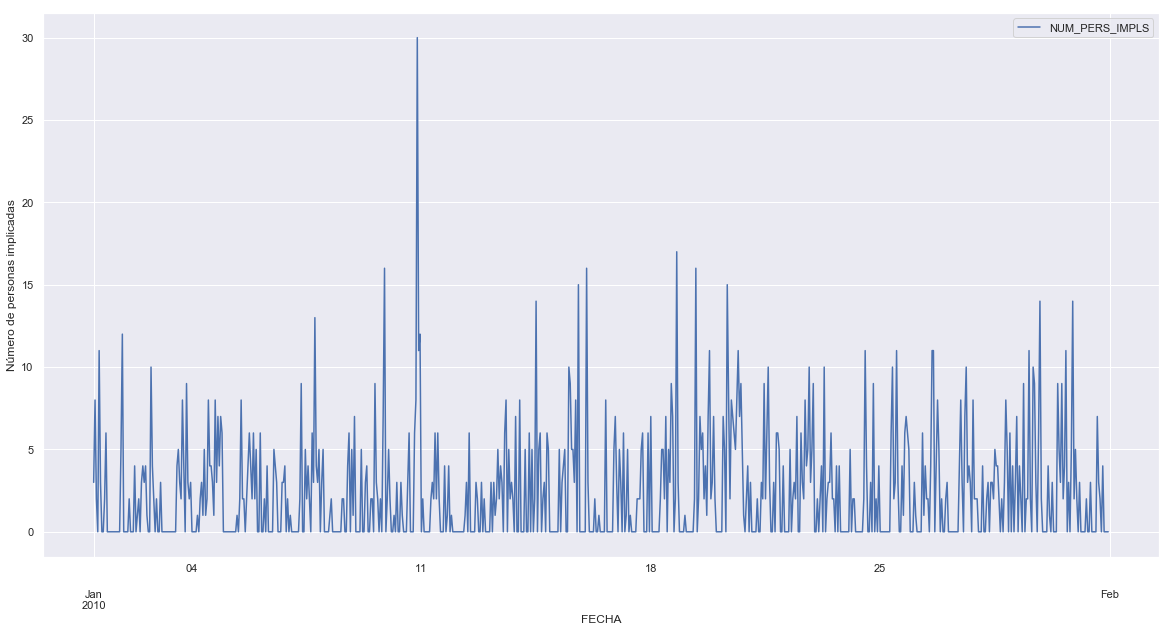

In [6086]:
sbn.set(rc={'figure.figsize':(20, 10)})
eje = prueba.plot()
eje.set_ylabel('Número de personas implicadas')

Text(0, 0.5, 'Número de personas implicadas')

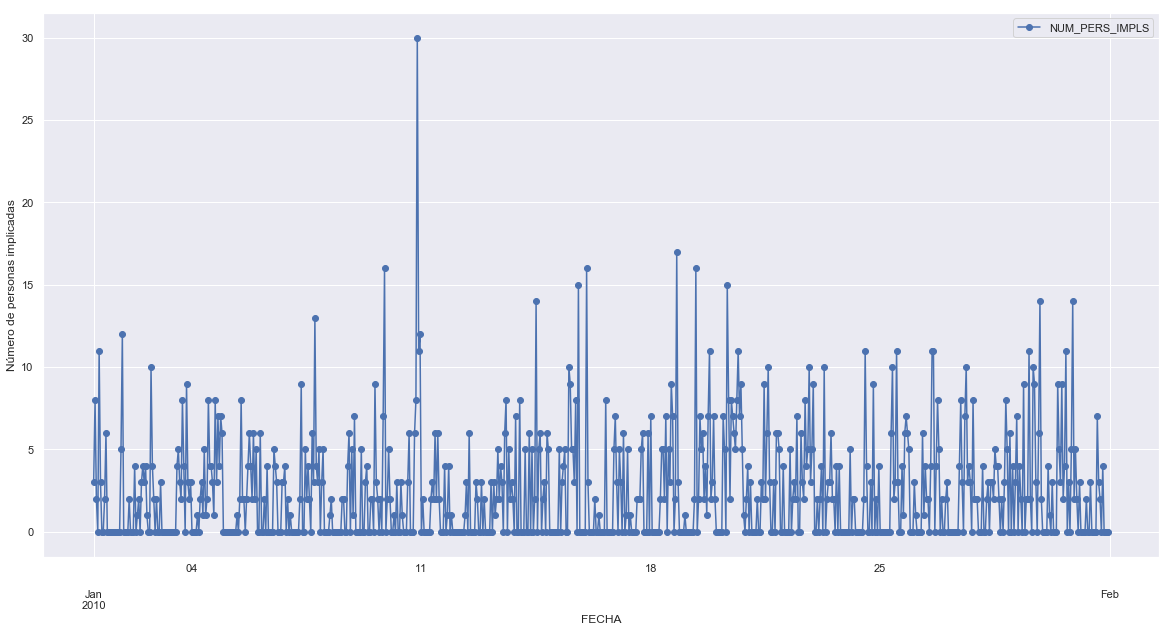

In [6087]:
eje = prueba.plot(marker='o',linestyle='-')
eje.set_ylabel('Número de personas implicadas')

In [6088]:
#s.resid
#s.seasonal
#s.trend

In [6089]:
# PRIMERA ETAPA: representar gráficamente la serie para identificar la tendencia y la estacionalidad 

In [6090]:
import matplotlib.pyplot as mplt # Esta función es utilizada para mostrar los gráficos
import seaborn as sbn #Se utilizará seaborn para el estilo de los gráficos y se ajustará el tamaño 
# de figura predeterminado a una forma más adecuada para las gráficas de series temporales.
sbn.set(rc={'figure.figsize':(20, 10)})

In [6091]:
#?s.resid.plot

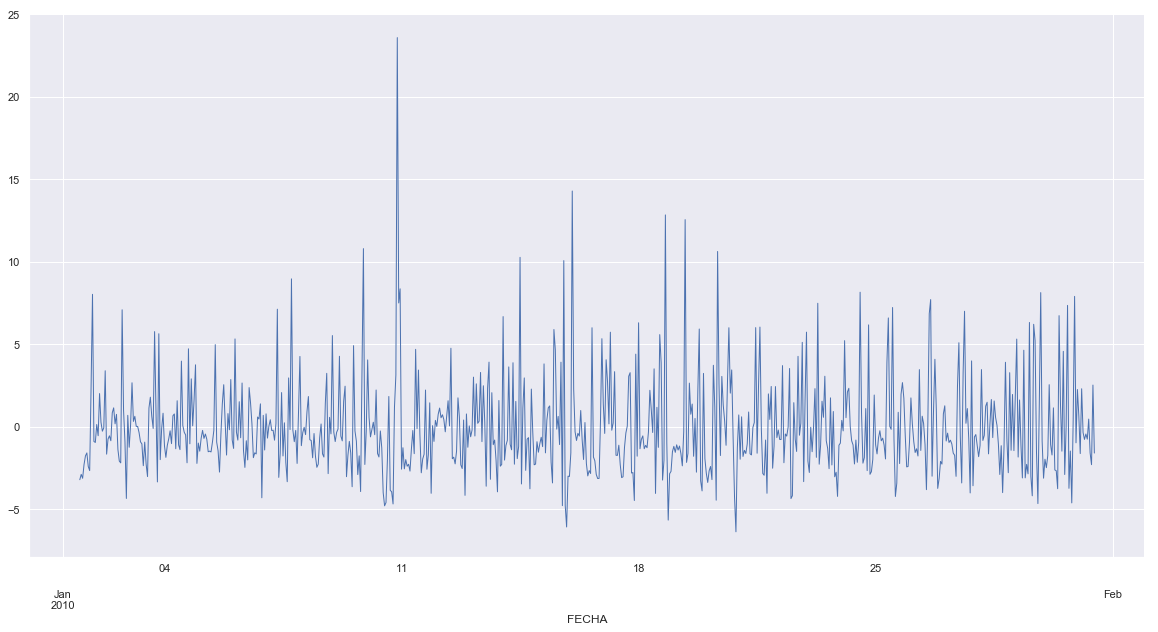

In [6092]:
#Se creará un gráfico de líneas de la series temporales completas, utilizando el método plot
s.resid.plot(linewidth=1)

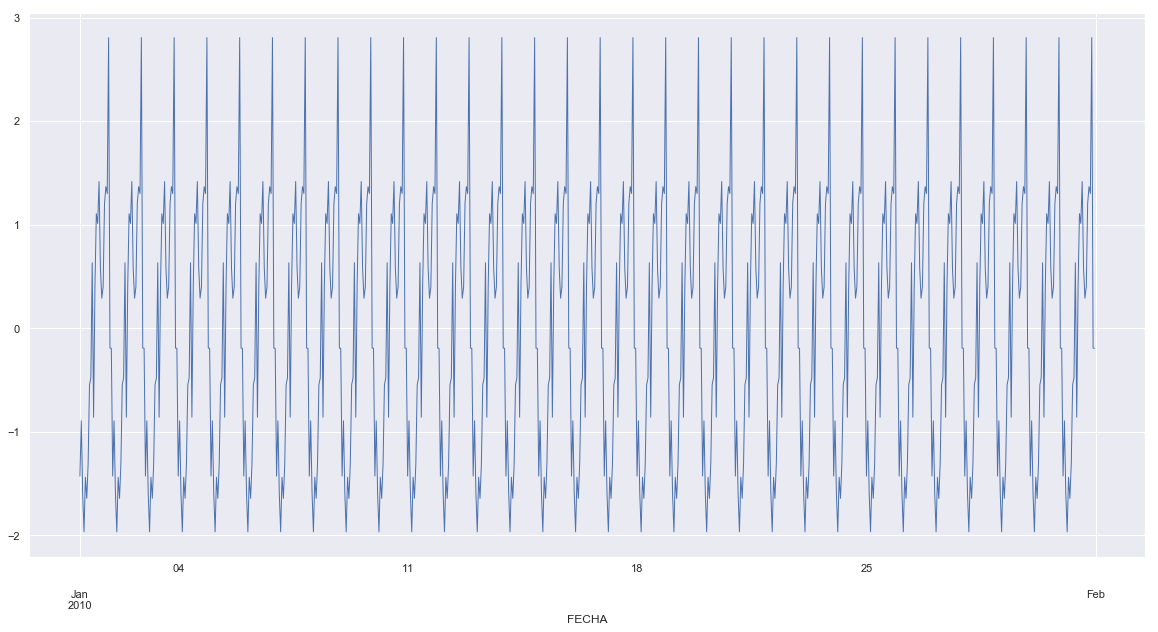

In [6093]:
s.seasonal.plot(linewidth=1)

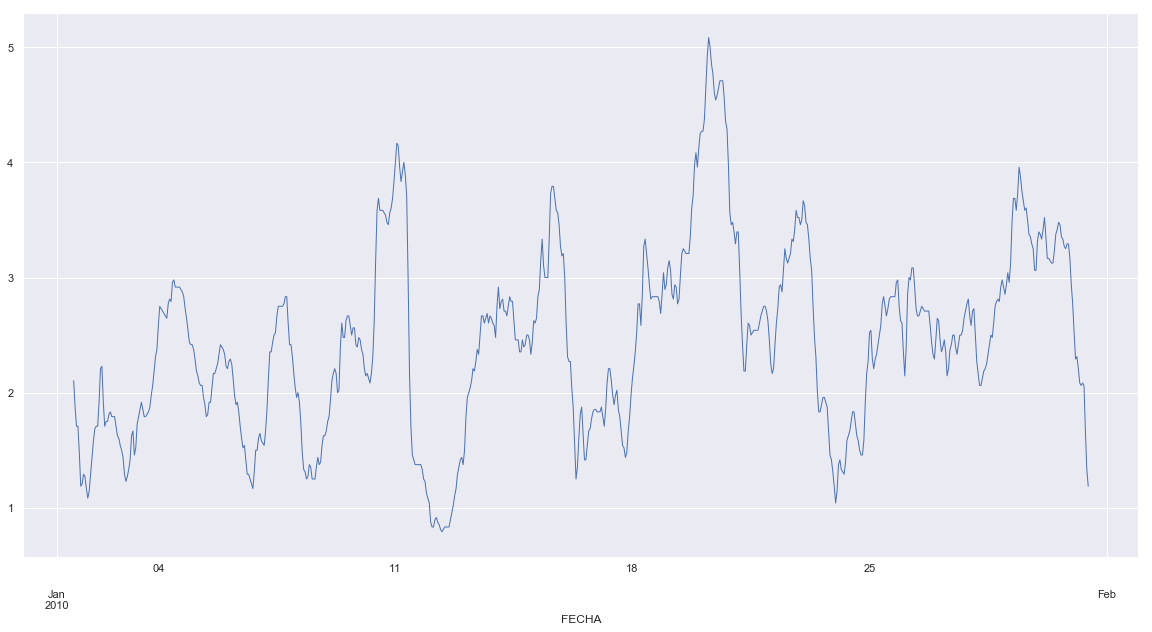

In [6094]:
s.trend.plot(linewidth=1)

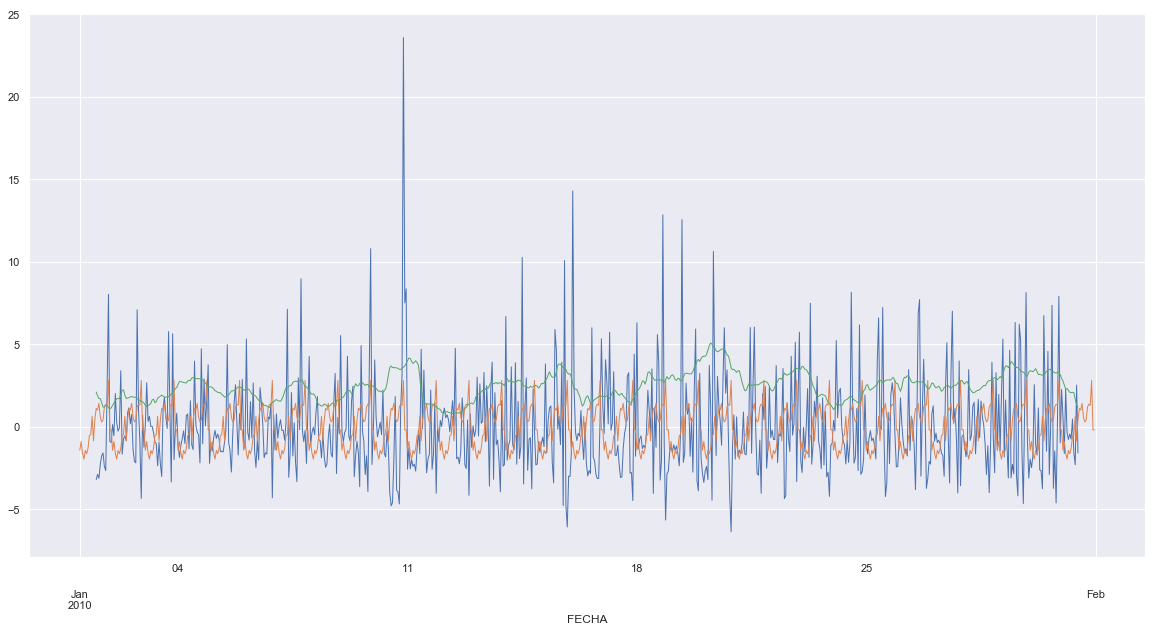

In [6095]:
s.resid.plot(linewidth=1)
s.seasonal.plot(linewidth=1)
s.trend.plot(linewidth=1)

In [6096]:
nube_puntos = [s.resid, s.seasonal, s.trend] 

In [6097]:
type(nube_puntos)

list

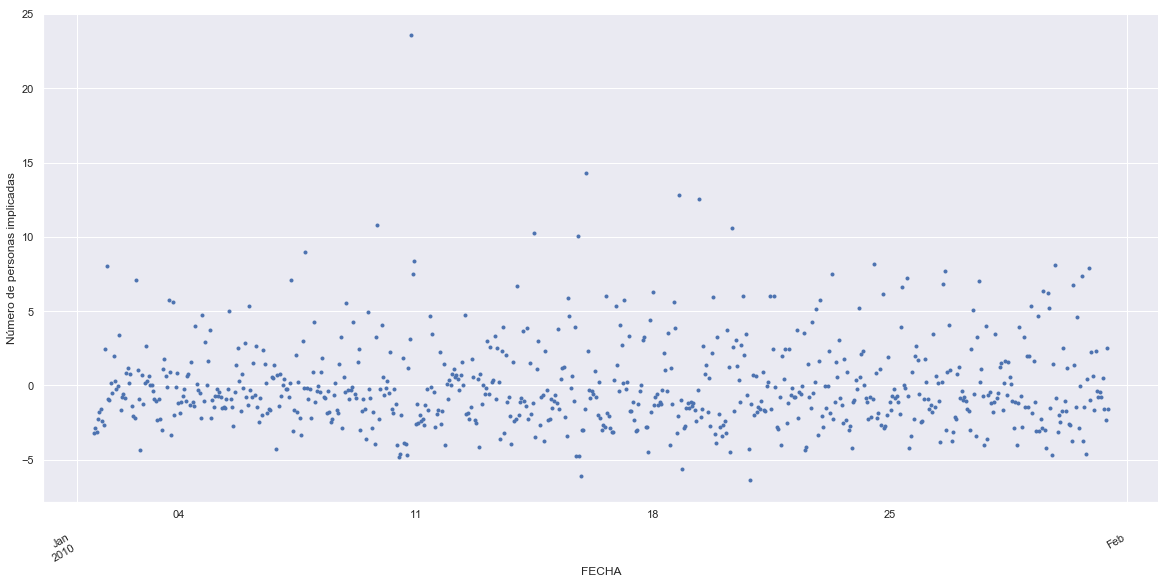

In [6098]:
ejes = s.resid.plot(marker='.', alpha=1, linestyle='None',figsize=(20,10),subplots=True)
for eje in ejes:
  eje.set_ylabel('Número de personas implicadas')

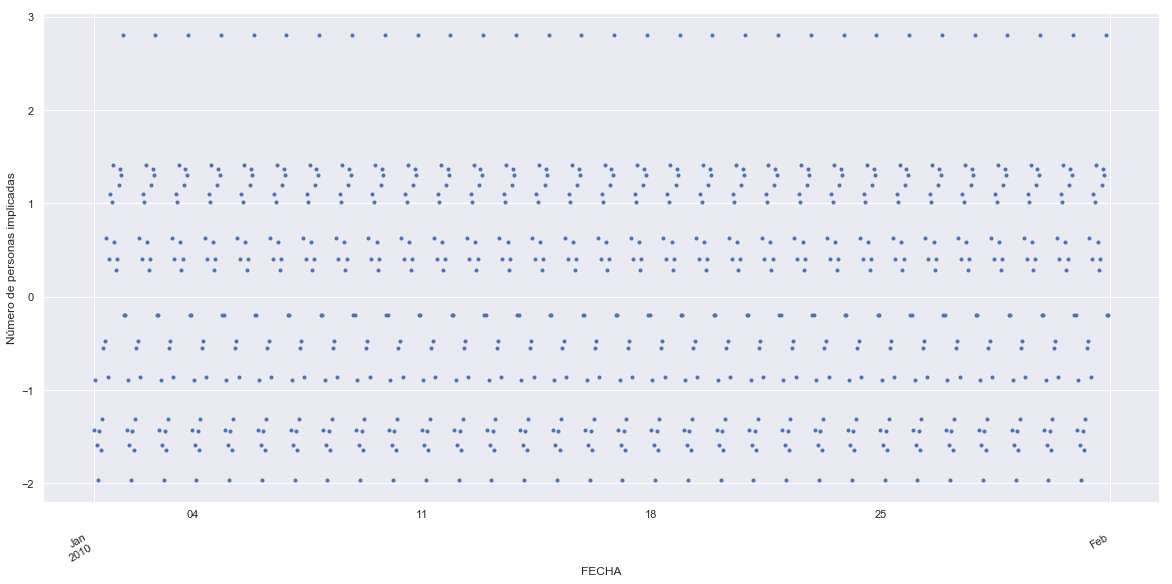

In [6099]:
ejes = s.seasonal.plot(marker='.', alpha=1, linestyle='None',figsize=(20,10),subplots=True)
for eje in ejes:
  eje.set_ylabel('Número de personas implicadas')

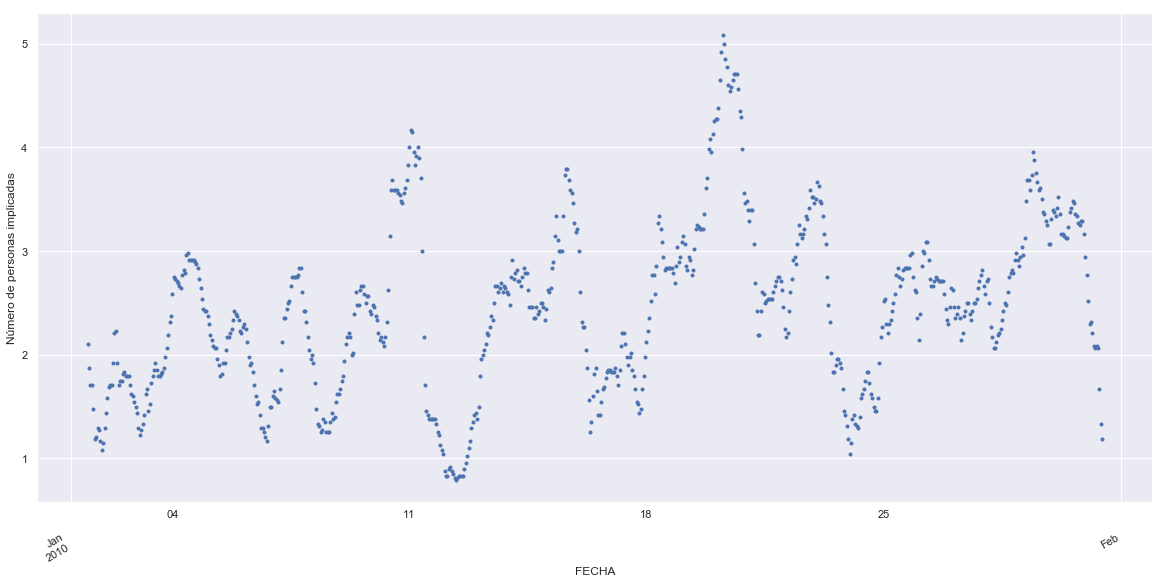

In [6100]:
ejes = s.trend.plot(marker='.', alpha=1, linestyle='None',figsize=(20,10),subplots=True)
for eje in ejes:
  eje.set_ylabel('Número de personas implicadas')

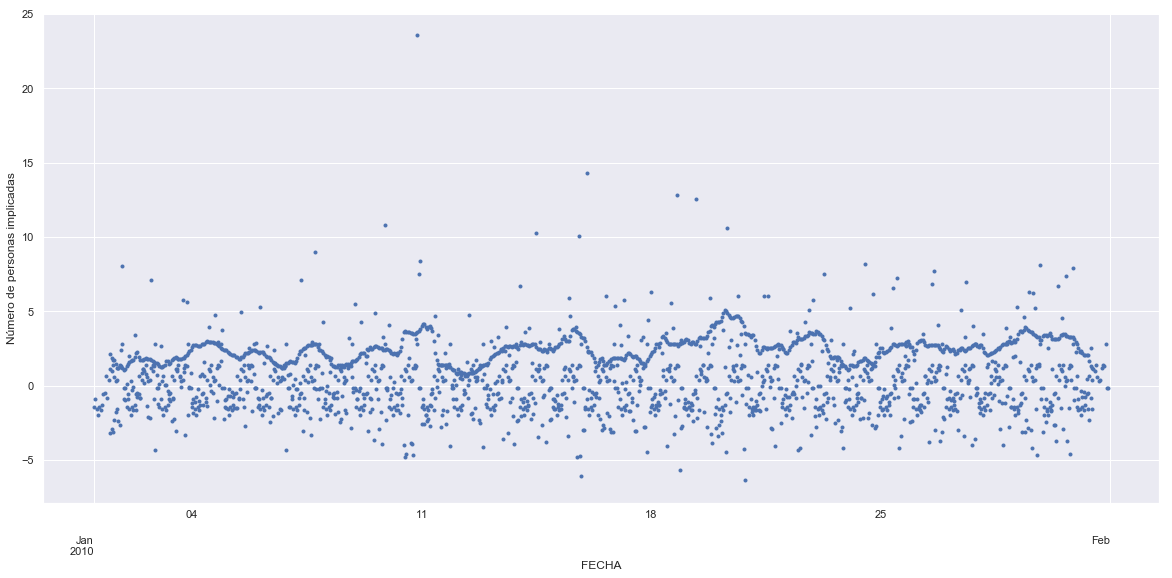

In [6101]:
ejes = s.resid.plot(marker='.', alpha=1, linestyle='None',figsize=(20,10),subplots=True)
ejes = s.seasonal.plot(marker='.', alpha=1, linestyle='None',figsize=(20,10),subplots=True)
ejes = s.trend.plot(marker='.', alpha=1, linestyle='None',figsize=(20,10),subplots=True)
for eje in ejes:
  eje.set_ylabel('Número de personas implicadas')

In [6102]:
######## ESTACIONALIDAD

In [6103]:
######## remuestreo de frecuencia 
media_semanal = prueba.resample('W').mean()
media_semanal.head(3)

,NUM_PERS_IMPLS
FECHA,
2010-01-03,1.944444
2010-01-10,2.363095
2010-01-17,2.017857


In [6104]:
prueba.iloc[0]

NUM_PERS_IMPLS    3
Name: 2010-01-01 00:00:00, dtype: int64

In [6105]:
prueba.loc[:,:].count()

NUM_PERS_IMPLS    744
dtype: int64

In [6106]:
type(prueba)

pandas.core.frame.DataFrame

In [6107]:
#?prueba.astype

In [6108]:
prueba.index.values[0]

numpy.datetime64('2010-01-01T00:00:00.000000000')

In [6109]:
prueba.index[0]

Timestamp('2010-01-01 00:00:00')

In [6110]:
prueba.index[-1]

Timestamp('2010-01-31 23:00:00')

In [6111]:
# Remuestreo para la media diaria
#columnas = ['name1','name2','namen']
media_diaria = prueba["NUM_PERS_IMPLS"].resample('D').mean()
media_diaria.head(3)

FECHA
2010-01-01    2.166667
2010-01-02    1.750000
2010-01-03    1.916667
Freq: D, Name: NUM_PERS_IMPLS, dtype: float64

In [6112]:
# Remuestreo para la media semanal
#columnas = ['name1','name2','namen']
media_semanal = prueba["NUM_PERS_IMPLS"].resample('W').mean()
media_semanal.head(3)

FECHA
2010-01-03    1.944444
2010-01-10    2.363095
2010-01-17    2.017857
Freq: W-SUN, Name: NUM_PERS_IMPLS, dtype: float64

In [6113]:
#?prueba.resample

In [6114]:
# Remuestreo para la media mensual
#columnas = ['name1','name2','namen']
media_mensual = prueba["NUM_PERS_IMPLS"].resample('M').mean()
media_mensual.head(3)

FECHA
2010-01-31    2.426075
Freq: M, Name: NUM_PERS_IMPLS, dtype: float64

In [6115]:
# Remuestreo para la media anual
#columnas = ['name1','name2','namen']
media_anual = prueba["NUM_PERS_IMPLS"].resample('Y').mean()
media_anual.head(3)

FECHA
2010-12-31    2.426075
Freq: A-DEC, Name: NUM_PERS_IMPLS, dtype: float64

In [6116]:
prueba.shape[0]

744

In [6117]:
media_semanal.shape[0]

5

In [6118]:
744/24/7

4.428571428571429

In [6119]:
#?eje.plot

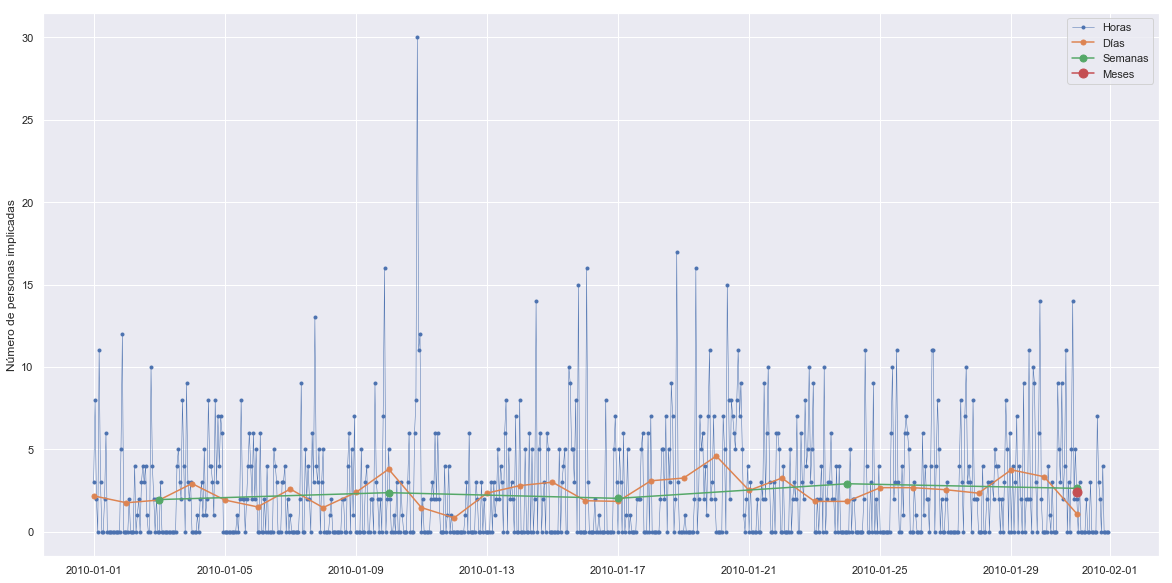

In [6120]:
## Se trazarán las series temporales diarias y semanales juntas en un solo período de 1 mes para compararlas.
inicio, final = prueba.index.values[0], prueba.index.values[-1]
fig,eje = mplt.subplots()
eje.plot(prueba.loc[inicio:final,'NUM_PERS_IMPLS'], marker='.',linestyle='-',linewidth=0.5,label='Horas')
eje.plot(media_diaria,marker='o',markersize=5,label='Días')
eje.plot(media_semanal,marker='o',markersize=7,label='Semanas')
eje.plot(media_mensual,marker='o',markersize=9,label='Meses')
#eje.plot(media_anual,marker='o',markersize=11,label='Años')
eje.set_ylabel('Número de personas implicadas')
eje.legend()

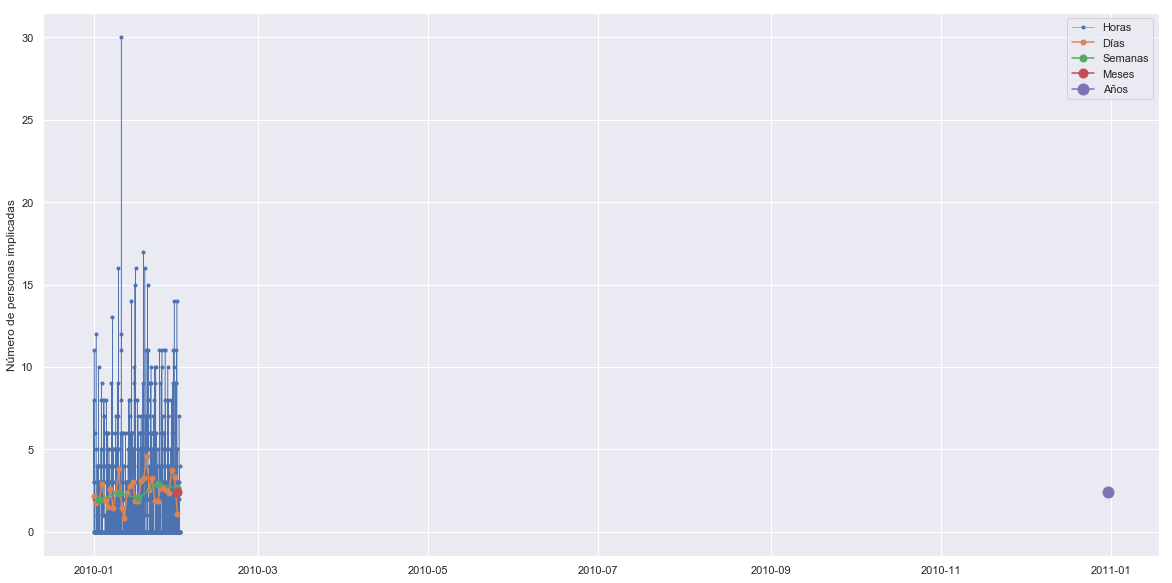

In [6121]:
## Se trazarán las series temporales diarias y semanales juntas en un solo período de 1 mes para compararlas.
inicio, final = prueba.index.values[0], prueba.index.values[-1]
fig,eje = mplt.subplots()
eje.plot(prueba.loc[inicio:final,'NUM_PERS_IMPLS'], marker='.',linestyle='-',linewidth=0.5,label='Horas')
eje.plot(media_diaria,marker='o',markersize=5,label='Días')
eje.plot(media_semanal,marker='o',markersize=7,label='Semanas')
eje.plot(media_mensual,marker='o',markersize=9,label='Meses')
eje.plot(media_anual,marker='o',markersize=11,label='Años')
eje.set_ylabel('Número de personas implicadas')
eje.legend()

In [6122]:
# Comprobar valores nulos
prueba.isnull().sum()

NUM_PERS_IMPLS    0
dtype: int64

In [6123]:
media_diaria.isnull().sum()

0

In [6124]:
media_semanal.isnull().sum()

0

In [6125]:
media_mensual.isnull().sum()

0

In [6126]:
media_anual.isnull().sum()

0

In [6127]:
# ventanas deslizantes: superponen tiempos y “deslizan” a la misma frecuencia que los datos, 
# por lo que las series temporales transformadas tienen la misma frecuencia que las series temporales originales.
# la misma ponderacion
import pandas as pnd
import matplotlib.pyplot as mplt
import seaborn as sbn

In [6128]:
24*7

168

In [6129]:
#?prueba.rolling

Text(0.5, 1.0, 'Tendencias de personas implicadas en accidentes de tráfico')

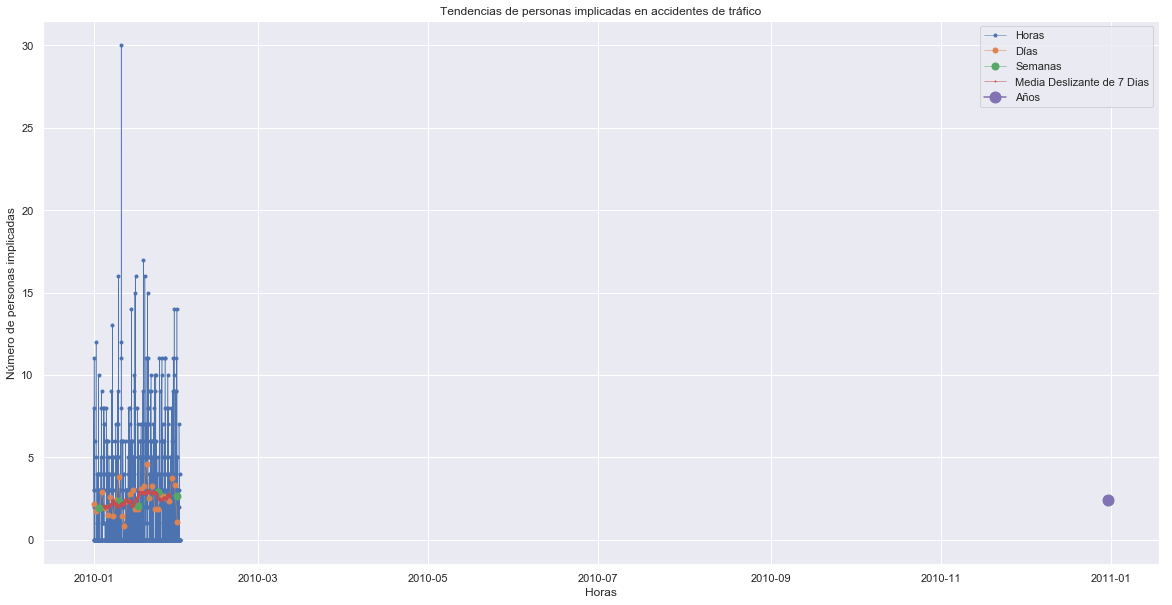

In [6130]:
sbn.set(rc={'figure.figsize':(20, 10)})
media_vd_semanal = prueba["NUM_PERS_IMPLS"].rolling(168, center=True).mean()
inicio, final = prueba.index.values[0], prueba.index.values[-1]
fig,eje = mplt.subplots()
eje.plot(prueba.loc[inicio:final,'NUM_PERS_IMPLS'], marker='.',linestyle='-',linewidth=0.5,label='Horas')
eje.plot(media_diaria,marker='o',markersize=5,linestyle='-', linewidth=0.5,label='Días')
eje.plot(media_semanal,marker='o',markersize=7,linestyle='-', linewidth=0.5,label='Semanas')
eje.plot(media_vd_semanal,marker='o',markersize=1,linestyle='-', linewidth=0.5,label='Media Deslizante de 7 Dias')
eje.plot(media_anual,marker='o',markersize=11,label='Años')
eje.legend()
eje.set_xlabel('Horas')
eje.set_ylabel('Número de personas implicadas')
eje.set_title('Tendencias de personas implicadas en accidentes de tráfico')

Text(0.5, 1.0, 'Tendencias de personas implicadas en accidentes de tráfico')

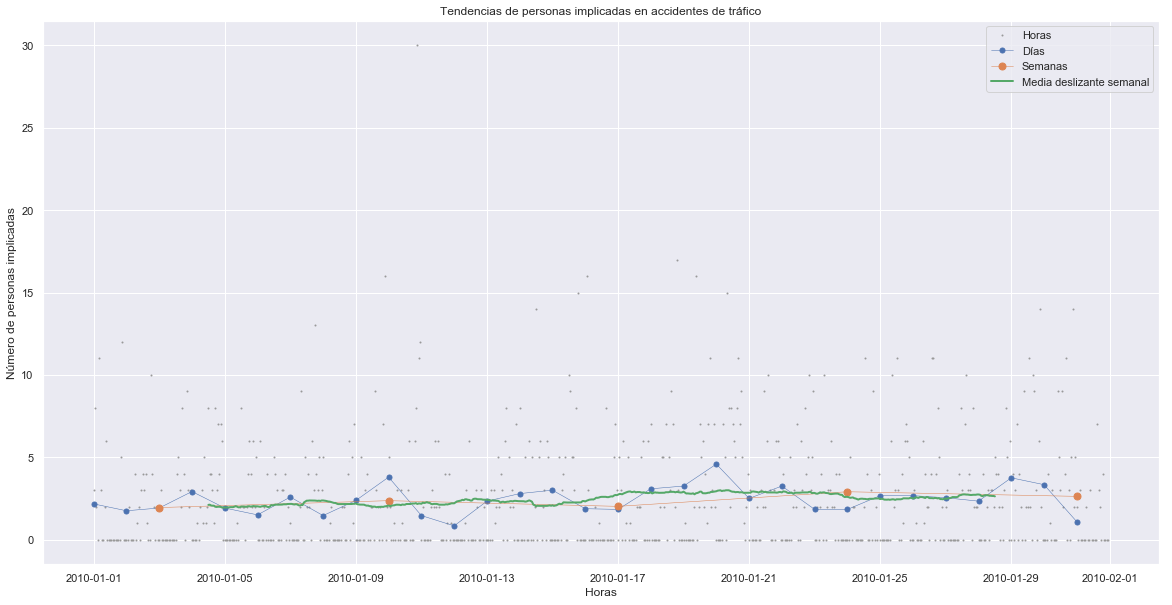

In [6131]:
sbn.set(rc={'figure.figsize':(20, 10)})
media_vd_semanal = prueba["NUM_PERS_IMPLS"].rolling(168, center=True).mean()
inicio, final = prueba.index.values[0], prueba.index.values[-1]
fig,eje = mplt.subplots()
eje.plot(prueba['NUM_PERS_IMPLS'], marker='.', markersize=2, color='0.6', linestyle='None', label='Horas')
#eje.plot(prueba.loc[inicio:final,'NUM_PERS_IMPLS'], marker='.',linestyle='-',linewidth=0.5,label='Horas')
eje.plot(media_diaria,marker='o',markersize=5,linestyle='-', linewidth=0.5,label='Días')
eje.plot(media_semanal,marker='o',markersize=7,linestyle='-', linewidth=0.5,label='Semanas')
#eje.plot(media_vd_semanal,marker='o',markersize=1,linestyle='-', linewidth=0.5,label='Media Deslizante de 7 Dias')
eje.plot(media_vd_semanal, linewidth=2, label='Media deslizante semanal')
#eje.plot(media_anual,marker='o',markersize=11,label='Años')
eje.legend()
eje.set_xlabel('Horas')
eje.set_ylabel('Número de personas implicadas')
eje.set_title('Tendencias de personas implicadas en accidentes de tráfico')

In [6132]:
# comprobar Prueba de Dicky-Fuller (DF-test) proporciona una manera más precisa de medir 
# la estacionariedad de nuestra serie. (“Test Statistic” menor que todos los “Critical Value”)
# CONCLUSION: Serie estacionaria

In [6133]:
# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
prueba_DickeyFuller = prueba.iloc[:,0].values
dftest = adfuller(prueba_DickeyFuller, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -5.565552
p-value                          0.000002
#Lags Used                      20.000000
Number of Observations Used    723.000000
Critical Value (1%)             -3.439427
Critical Value (5%)             -2.865546
Critical Value (10%)            -2.568903
dtype: float64


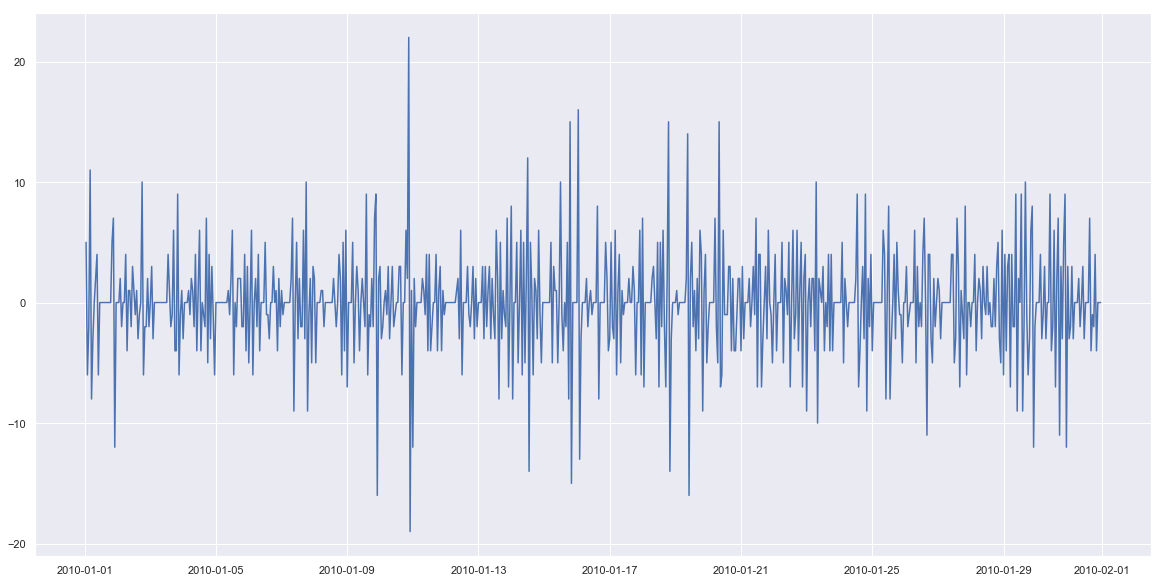

In [6134]:
# Por diferenciación
prueba_diff = prueba - prueba.shift()
plt.plot(prueba_diff)

In [6135]:
# Análisis de los residuos: 
# debe verificarse el supuesto de que los errores del modelo son un proceso puramente aleatorio 
# (media cero, varianza constante y no correlación serial), es decir, no tienen estructura de 
# dependencia (los residuos no deben estar correlacionados el pasado, deben ser independientes 
# los unos de los otros) y siguen un proceso de ruido blanco.

In [6136]:
# FORECASTING PROBABILIDAD versus ALEATORIEDAD (bandas de Bartlett)
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6137]:
prueba.mean()

NUM_PERS_IMPLS    2.426075
dtype: float64

In [6138]:
s.resid.mean()

-0.009780092592592554

In [6139]:
s.seasonal.mean()

8.953411488912552e-19

In [6140]:
s.trend.mean()

2.445891203703704

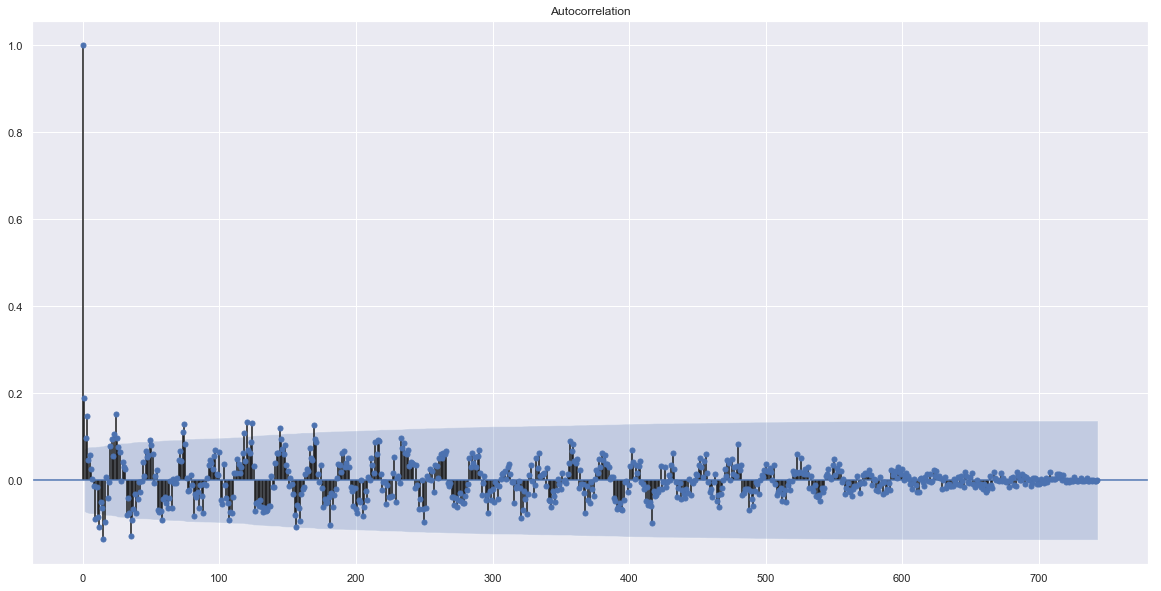

In [6141]:
plot_acf(prueba)
pyplot.show()

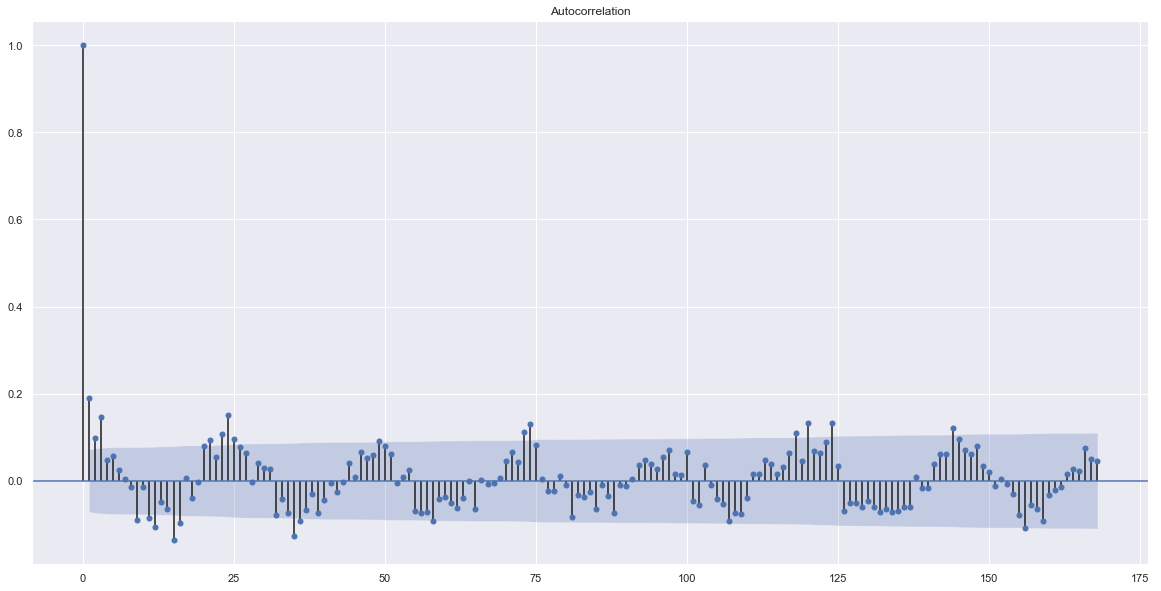

In [6142]:
plot_acf(prueba, lags=168)
pyplot.show()

/home/dsc/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


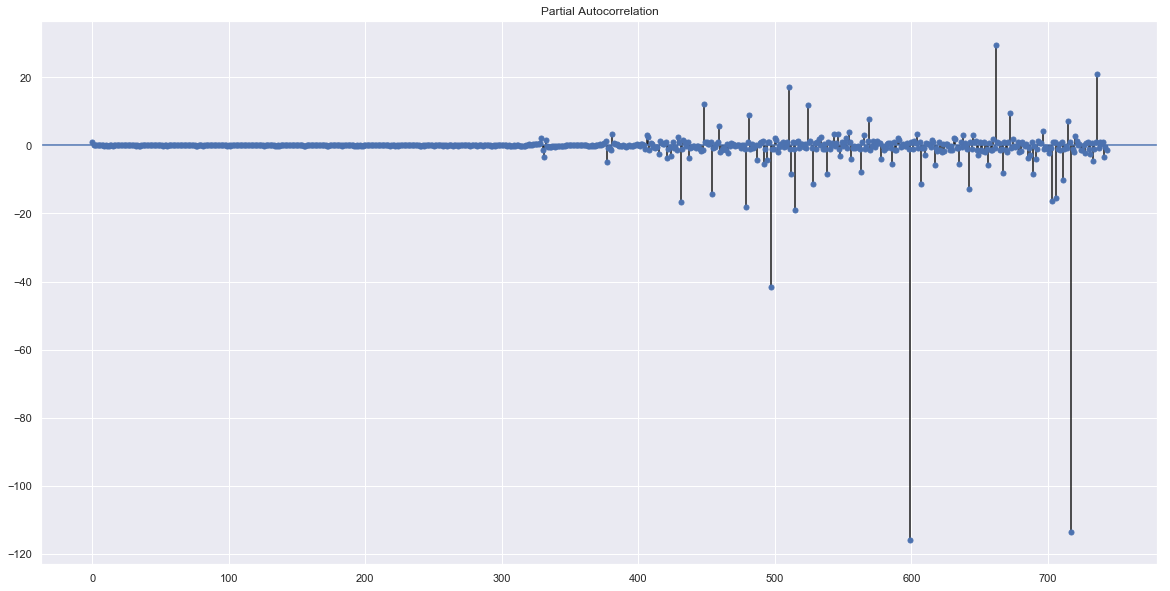

In [6143]:
plot_pacf(prueba)
pyplot.show()

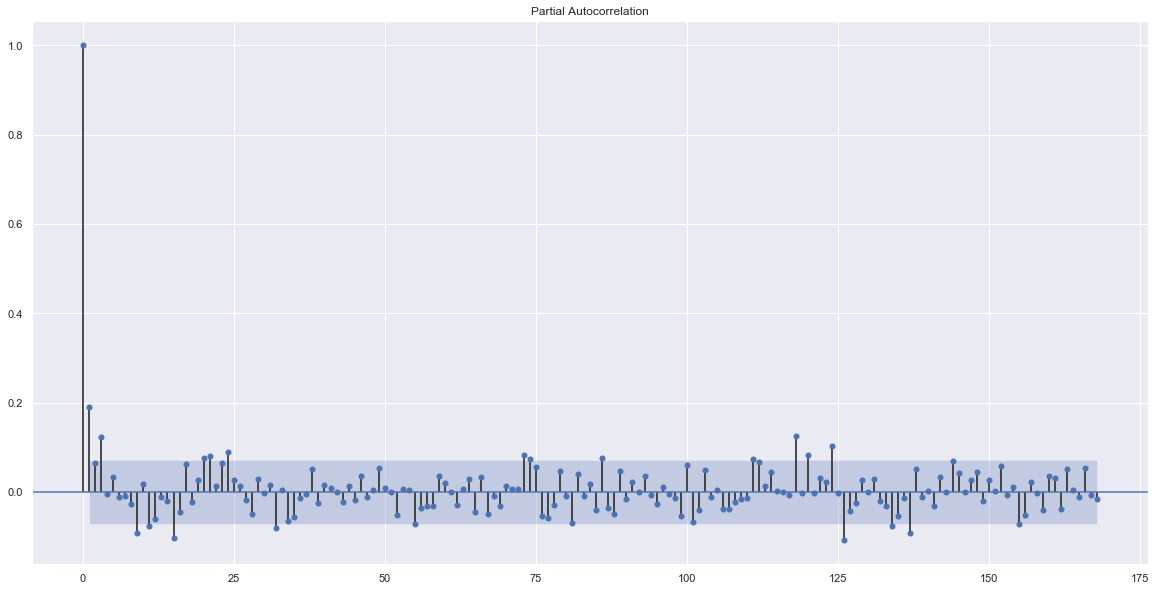

In [6144]:
plot_pacf(prueba, lags=168)
pyplot.show()

In [6145]:
######## ARM PRUEBA:
%matplotlib inline

In [6146]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [6147]:
import seaborn as sbn

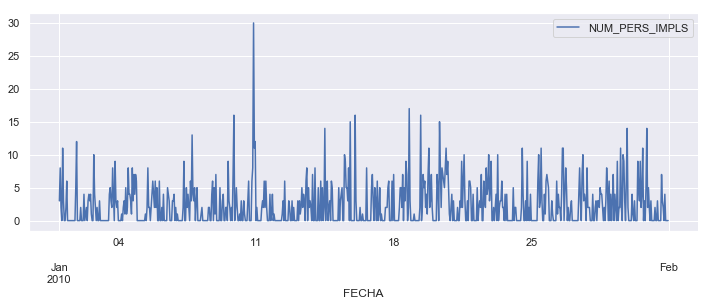

In [6149]:
prueba.plot(figsize=(12,4));

In [6150]:
prueba.shape

(744, 1)

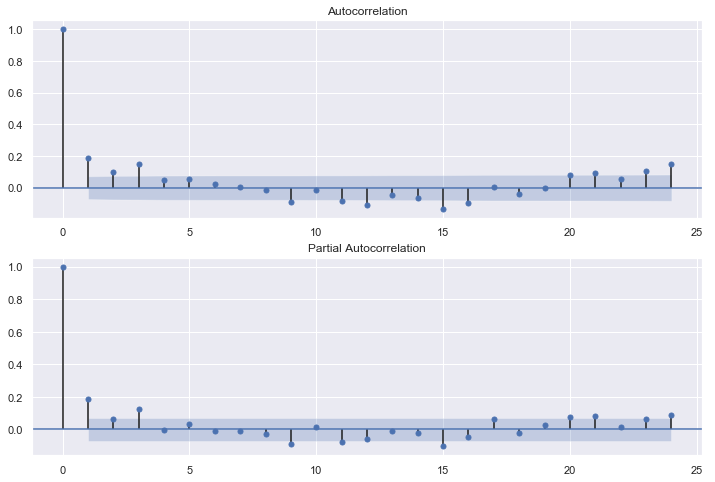

In [6151]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(prueba.values.squeeze(), lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(prueba, lags=24, ax=ax2)

In [6152]:
prueba.shape

(744, 1)

In [6153]:
prueba.index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2010-01-31 14:00:00', '2010-01-31 15:00:00',
               '2010-01-31 16:00:00', '2010-01-31 17:00:00',
               '2010-01-31 18:00:00', '2010-01-31 19:00:00',
               '2010-01-31 20:00:00', '2010-01-31 21:00:00',
               '2010-01-31 22:00:00', '2010-01-31 23:00:00'],
              dtype='datetime64[ns]', name='FECHA', length=744, freq=None)

In [6154]:
prueba.NUM_PERS_IMPLS.count()

744

In [6161]:
# Constante de varianza de la media 2.42 (previsiblemente ruido blanco)
arma_mod00 = sm.tsa.ARMA(prueba, (0,0), freq='H').fit(disp=False)
print(arma_mod00.params)

const    2.426075
dtype: float64


In [6162]:
# Posiblemente parámetro por término de ruido en observación estacionaria
arma_mod10 = sm.tsa.ARMA(prueba, (1,0), freq='H').fit(disp=False)
print(arma_mod10.params)

const                   2.425494
ar.L1.NUM_PERS_IMPLS    0.189292
dtype: float64


In [6164]:
# Posiblemente parámetro por término de ruido en observación estacionaria
arma_mod11 = sm.tsa.ARMA(prueba, (1,1), freq='H').fit(disp=False)
print(arma_mod11.params)

const                   2.425336
ar.L1.NUM_PERS_IMPLS    0.691220
ma.L1.NUM_PERS_IMPLS   -0.529883
dtype: float64


In [5802]:
print(arma_mod21.aic, arma_mod21.bic, arma_mod21.hqic)

3875.5544817540776 3898.614686928243 3884.4434056146238


In [5810]:
print(arma_mod21.summary())

                              ARMA Model Results                              
Dep. Variable:         NUM_PERS_IMPLS   No. Observations:                  744
Model:                     ARMA(2, 1)   Log Likelihood               -1932.777
Method:                       css-mle   S.D. of innovations              3.251
Date:                Sun, 03 Nov 2019   AIC                           3875.554
Time:                        12:15:34   BIC                           3898.615
Sample:                    01-01-2010   HQIC                          3884.443
                         - 01-31-2010                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.4253      0.181     13.383      0.000       2.070       2.780
ar.L1.NUM_PERS_IMPLS     0.7157      0.141      5.080      0.000       0.440       0.992
ar.L2.NUM_PE

In [5811]:
print(arma_mod21.summary2())

                           Results: ARMA
Model:              ARMA             BIC:                 3898.6147 
Dependent Variable: NUM_PERS_IMPLS   Log-Likelihood:      -1932.8   
Date:               2019-11-03 12:15 Scale:               1.0000    
No. Observations:   744              Method:              css-mle   
Df Model:           4                Sample:              01-01-2010
Df Residuals:       740                                   01-31-2010
Converged:          1.0000           S.D. of innovations: 3.251     
No. Iterations:     12.0000          HQIC:                3884.443  
AIC:                3875.5545                                       
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                 2.4253   0.1812 13.3832 0.0000  2.0701  2.7805
ar.L1.NUM_PERS_IMPLS  0.7157   0.1409  5.0795 0.0000  0.4395  

In [5812]:
sm.stats.durbin_watson(arma_mod21.resid.values)

1.9979629390932319

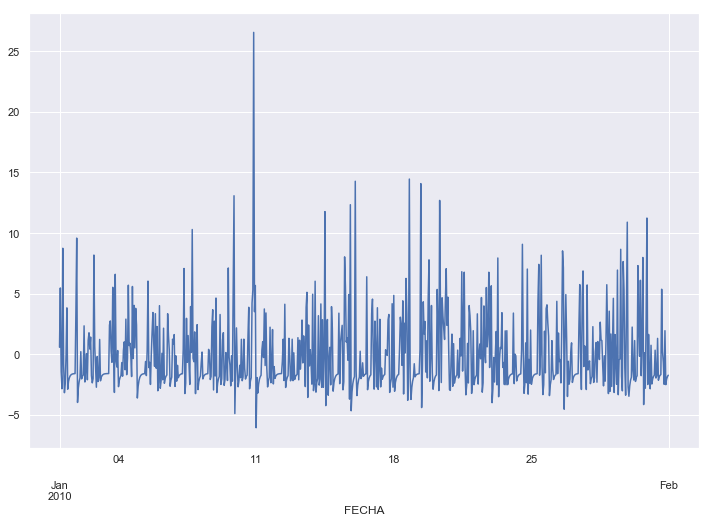

In [5813]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod21.resid.plot(ax=ax);

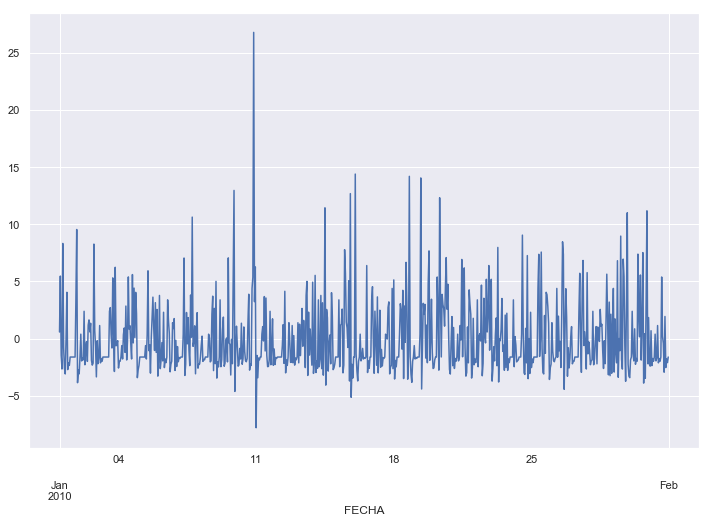

In [5146]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [5814]:
resid = arma_mod21.resid

In [5815]:
stats.normaltest(resid)

NormaltestResult(statistic=362.63774212261023, pvalue=1.7956216502163303e-79)

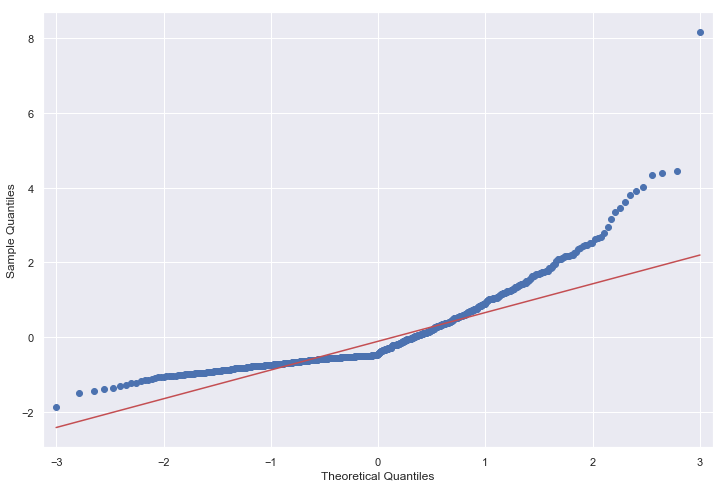

In [5821]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

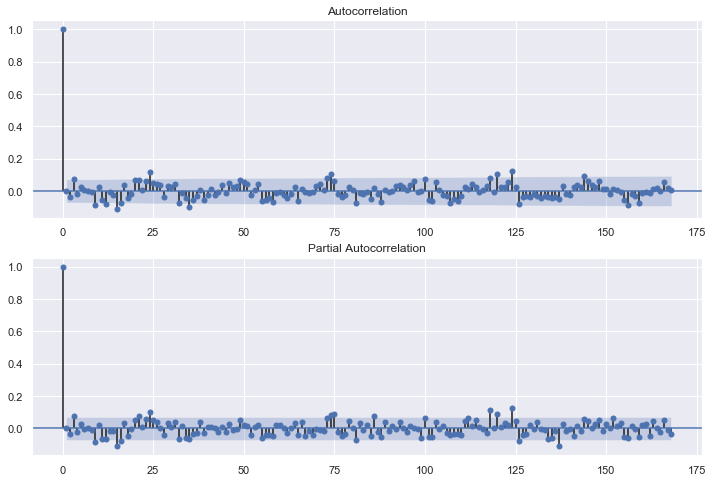

In [5822]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=168, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=168, ax=ax2)

In [5823]:
prueba.shape

(744, 1)

In [5824]:
resid.shape

(744,)

In [5825]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), nlags=168, fft=True, qstat=True)

In [5826]:
r.shape

(169,)

In [5831]:
#r,q,p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
prueba = np.c_[range(1,169), r[1:], q, p]
table = pd.DataFrame(prueba, columns=['lag', "AC", "Q", "Prob(>Q)"])
#print(table.set_index('lag'))
table.set_index('lag').head(3)

,AC,Q,Prob(>Q)
lag,,,
1.0,0.000807,0.000486,0.982411
2.0,-0.036931,1.020719,0.600280
3.0,0.072825,4.993120,0.172302


In [5835]:
predict_num_pers_impls = arma_mod21.predict(dynamic=True)
#print(predict_num_pers_impls)
predict_num_pers_impls.head(3)

2010-01-01 02:00:00    3.400452
2010-01-01 03:00:00    3.062361
2010-01-01 04:00:00    2.870600
Freq: H, dtype: float64

In [5836]:
predict_num_pers_impls.shape

(742,)

In [5837]:
predict_num_pers_impls.count()

742

AttributeError: 'numpy.ndarray' object has no attribute 'index'

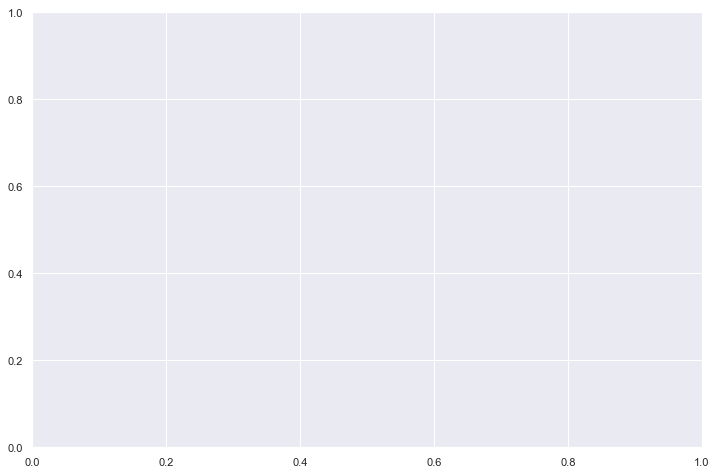

In [5841]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = prueba.index[0:].plot(ax=ax)
fig = arma_mod21.plot_predict(dynamic=True, ax=ax, plot_insample=False)

In [5159]:
########### SEGUNDA ETAPA: estimar los coeficientes/parámetros de los términos 
# autorregresivos (AR) y de media móvil (MA) del modelo.
#La estimación maxima de verosimilitud (MLE) es un metodo estadístico para ajustando un modelo a los datos y provee estimaciones para los parámetros del modelo.
#mean es el modelo de la media (ej. mu)
#sigma es desviación estándar del modelo residual/innovaciones.
#El orden de parámetros en el argumento de entrada - phi - determina el orden del componente AR.
#* comenzando con el lag más bajo
#El orden de parámetros en el argumento de entrada- theta - determina el orden del componente MA.
#* comenzando por el lag más bajo
#--- LE MODELO ES ESTABLE?

In [5160]:
#from statsmodels.tsa.arima_model import ARIMA
#model = ARIMA(prueba, order=(168,24,1))
#model_fit = model.fit()
#output = model_fit.forecast()
#yhat = output[0]

In [5161]:
# Limpiar serie temporal antes de analizar tendencia y estacionalidad de comportamientos no deseados (sesgos),
# varianzas desiguales para corregir la no linealidad en la relación (mejorar correlación entre las variables). 
# Comprobar si es heterocedástica (no es constante en varianza); es frecuente observar que la varianza 
# aumenta con el nivel de la serie. Por lo tanto no sigue una distribución normal
# es recomendable realizar alguna de las siguientes transformaciones para acercarse más a una distribución normal:
# a) Transformación logarítmica: expandir valores pequeños y contraer los grandes
# b) Transformación de Box-Cox: lambda para aumentar la normalidad.
    

In [5162]:
# BOX JENKINS con ARMA

In [5163]:
####### aqui